# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Items Shipped.csv')

df.head()

C:\Users\clayton\AppData\Local\Temp\ipykernel_8800\2935460210.py:6: DtypeWarning: Columns (10,17,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Items Shipped.csv')


,Customer Name,Parent,Account Manager,Item,Item Description,Product Group,Parent Product Group,Netsuite Link,Sales Order,Customer PO,...,Import/Domestic,Location,Is Individual,Quantity,Amount,Sell Price,Shipping State/Province,Online Flag,Internal ID,Shipping Address
0,Mills Fleet Farm : Mills Fleet Farm IMPORT,Mills Fleet,Mark Malen,2287,Original 28in Omnivore Griddle w/Hood,Griddles,Cooking Unit,"<a href=""https://4688310.app.netsuite.com/app/...",Sales Order #SO01156820,4354984,...,Import,NaN,False,290.0,46893.00,161.700000,WI,0,26537712,#98030 Chippewa Falls DC\r\n2900 Lakeview Dr\r...
1,Costco Wholesale US Import,Costco,Vance Jensen,2377,"Original 36in Griddle W/Hood, front shelf and...",Griddles,Cooking Unit,"<a href=""https://4688310.app.netsuite.com/app/...",Sales Order #SO01269330,009600315559,...,Import,NaN,False,210.0,54931.80,261.580000,CA,0,26543839,COSTCO MIRA LOMA DRY\r\n11600 RIVERSIDE DR BUI...
2,WALMART IMPORT,Walmart,Vance Jensen,1868,"36"" Griddle AirFryer",Griddles,Cooking Unit,"<a href=""https://4688310.app.netsuite.com/app/...",Sales Order #SO01122213,4680435233,...,Import,NaN,False,39.0,11804.63,302.682821,NaN,0,26553520,SUFFOLK-STORAGE\r\nUnited States
3,WALMART IMPORT,Walmart,Vance Jensen,1785,"28"" AirFryer Combo",Griddles,Cooking Unit,"<a href=""https://4688310.app.netsuite.com/app/...",Sales Order #SO01122213,4680435233,...,Import,NaN,False,16.0,3440.98,215.061250,NaN,0,26553520,SUFFOLK-STORAGE\r\nUnited States
4,WALMART IMPORT,Walmart,Vance Jensen,2295,36 inch Griddle with Pizza Oven / Air Fryer,Griddles,Cooking Unit,"<a href=""https://4688310.app.netsuite.com/app/...",Sales Order #SO01122213,4680435233,...,Import,NaN,False,17.0,6900.74,405.925882,NaN,0,26553520,SUFFOLK-STORAGE\r\nUnited States


# General EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527253 entries, 0 to 2527252
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Customer Name            object 
 1   Parent                   object 
 2   Account Manager          object 
 3   Item                     object 
 4   Item Description         object 
 5   Product Group            object 
 6   Parent Product Group     object 
 7   Netsuite Link            object 
 8   Sales Order              object 
 9   Customer PO              object 
 10  Tracking Numbers         object 
 11  Invoice Status           object 
 12  Date Created             object 
 13  Date                     object 
 14  Ship Date                object 
 15  Import/Domestic          object 
 16  Location                 object 
 17  Is Individual            object 
 18  Quantity                 float64
 19  Amount                   float64
 20  Sell Price               float64
 21  Shipping

In [3]:
df.describe()

,Quantity,Amount,Sell Price,Online Flag,Internal ID
count,2.425133e+06,2.527253e+06,2.337659e+06,2.527253e+06,2.527253e+06
mean,2.725147e+01,8.624010e+02,6.932310e+01,7.317435e-01,1.854981e+07
std,3.124660e+02,1.581063e+04,9.583905e+02,4.430519e-01,6.085890e+06
min,-3.950000e+03,-1.308550e+07,-2.522940e+03,0.000000e+00,3.459005e+06
25%,1.000000e+00,0.000000e+00,4.050000e+00,0.000000e+00,1.489022e+07
50%,1.000000e+00,2.300000e+01,1.816000e+01,1.000000e+00,1.996342e+07
75%,1.000000e+00,7.800000e+01,4.719000e+01,1.000000e+00,2.321209e+07
max,1.000080e+05,7.830495e+06,4.747200e+05,1.000000e+00,2.655969e+07


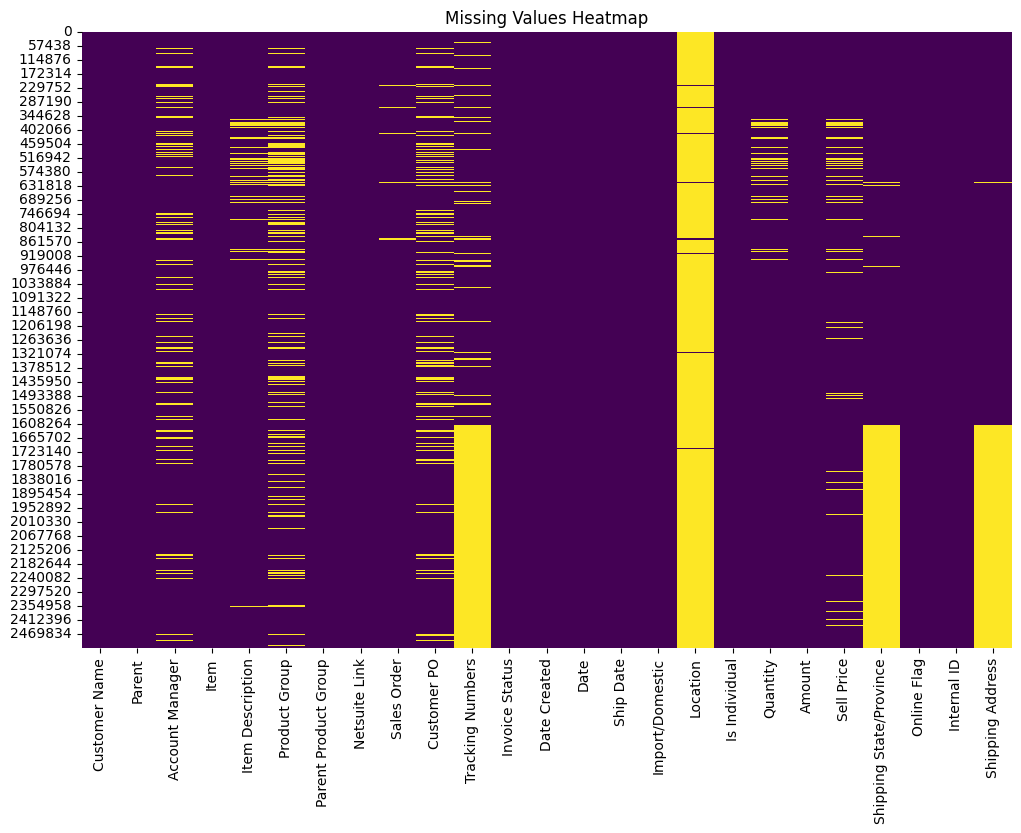

In [4]:
# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Missing values count
missing_values = df.isnull().sum()

Tracking numbers, Location, Shipping State/Province, and Shipping Address all have substantial data missing. Our target variable also has missing data and we will need to determine what to do. Later on we determine the quantity is highly skewed to the right. 

C:\Users\clayton\AppData\Local\Temp\ipykernel_8800\3463843239.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


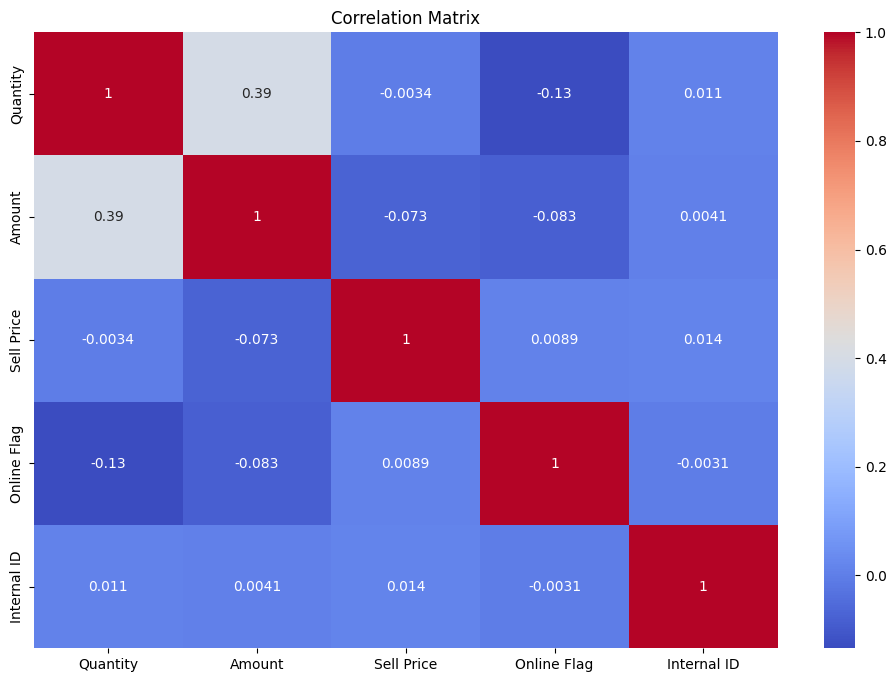

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can probably drop Internal ID as it a unique identifier.

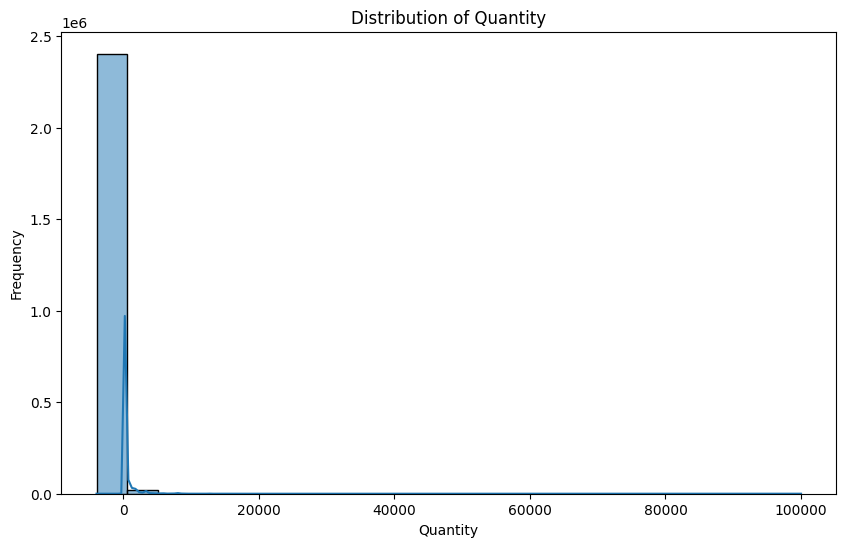

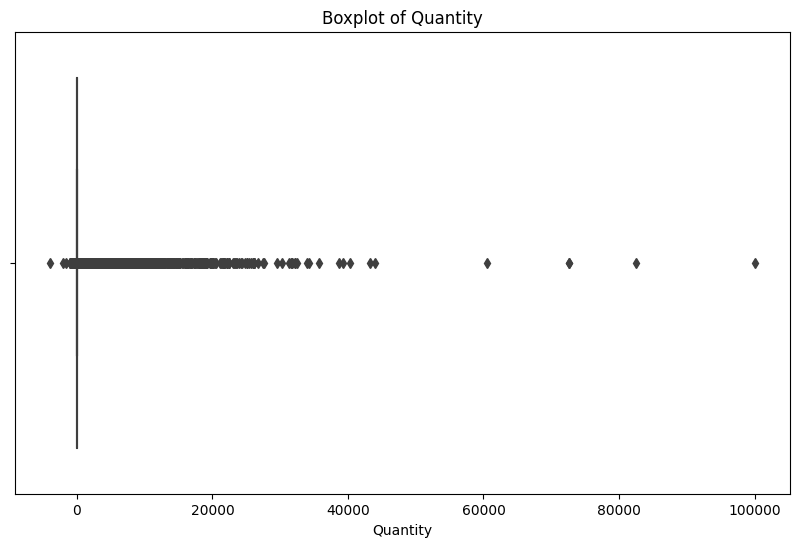

In [6]:
# # Histograms
numerical_features = ['Quantity']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

The quantity is highly skewed because each line in the dataset refers to one order. We could aggregate the data by item and by day/month/week to see what that does. 

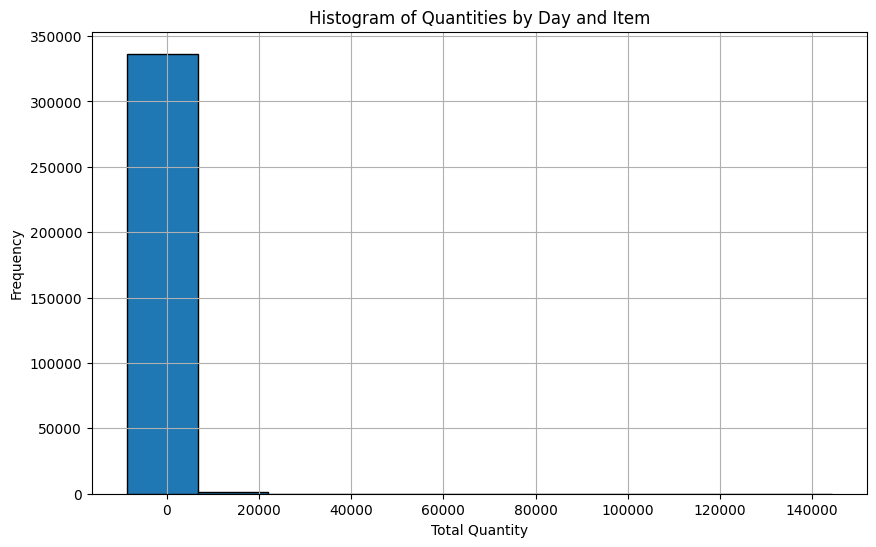

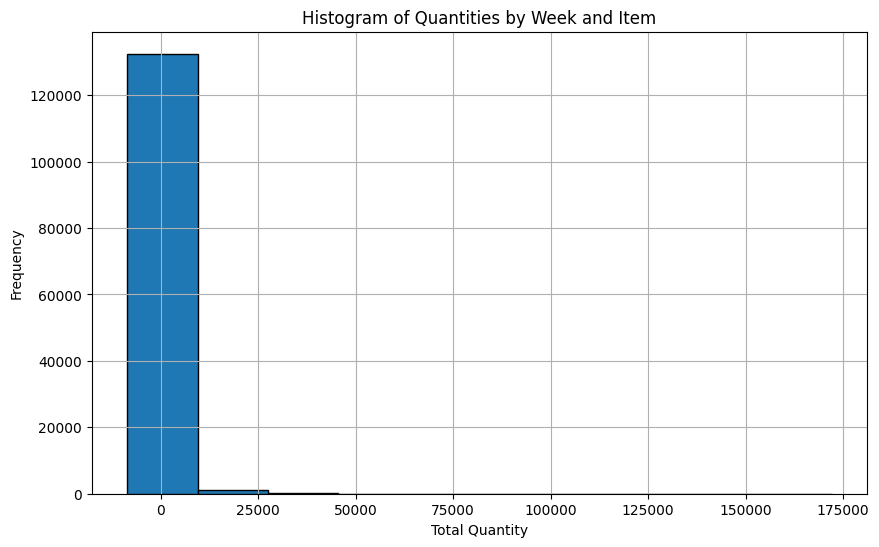

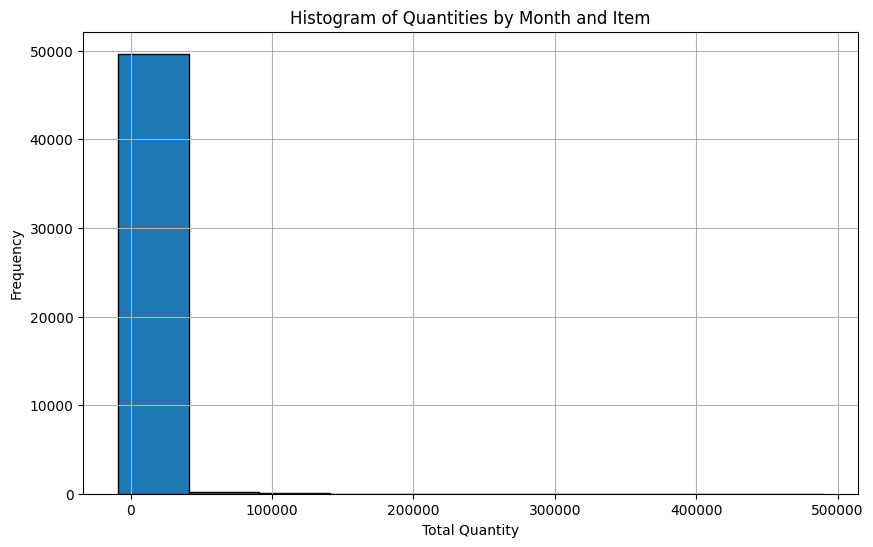

In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sum quantity by day and by item
quantity_by_day_item = df.groupby([df['Date'].dt.date, 'Item'])['Quantity'].sum().reset_index()

# Sum quantity by week and by item
quantity_by_week_item = df.groupby([df['Date'].dt.to_period('W'), 'Item'])['Quantity'].sum().reset_index()

# Sum quantity by month and by item
quantity_by_month_item = df.groupby([df['Date'].dt.to_period('M'), 'Item'])['Quantity'].sum().reset_index()

# Histogram for quantities by day
plt.figure(figsize=(10, 6))
plt.hist(quantity_by_day_item['Quantity'], bins=10, edgecolor='black')
plt.title('Histogram of Quantities by Day and Item')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for quantities by week
plt.figure(figsize=(10, 6))
plt.hist(quantity_by_week_item['Quantity'], bins=10, edgecolor='black')
plt.title('Histogram of Quantities by Week and Item')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for quantities by month
plt.figure(figsize=(10, 6))
plt.hist(quantity_by_month_item['Quantity'], bins=10, edgecolor='black')
plt.title('Histogram of Quantities by Month and Item')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


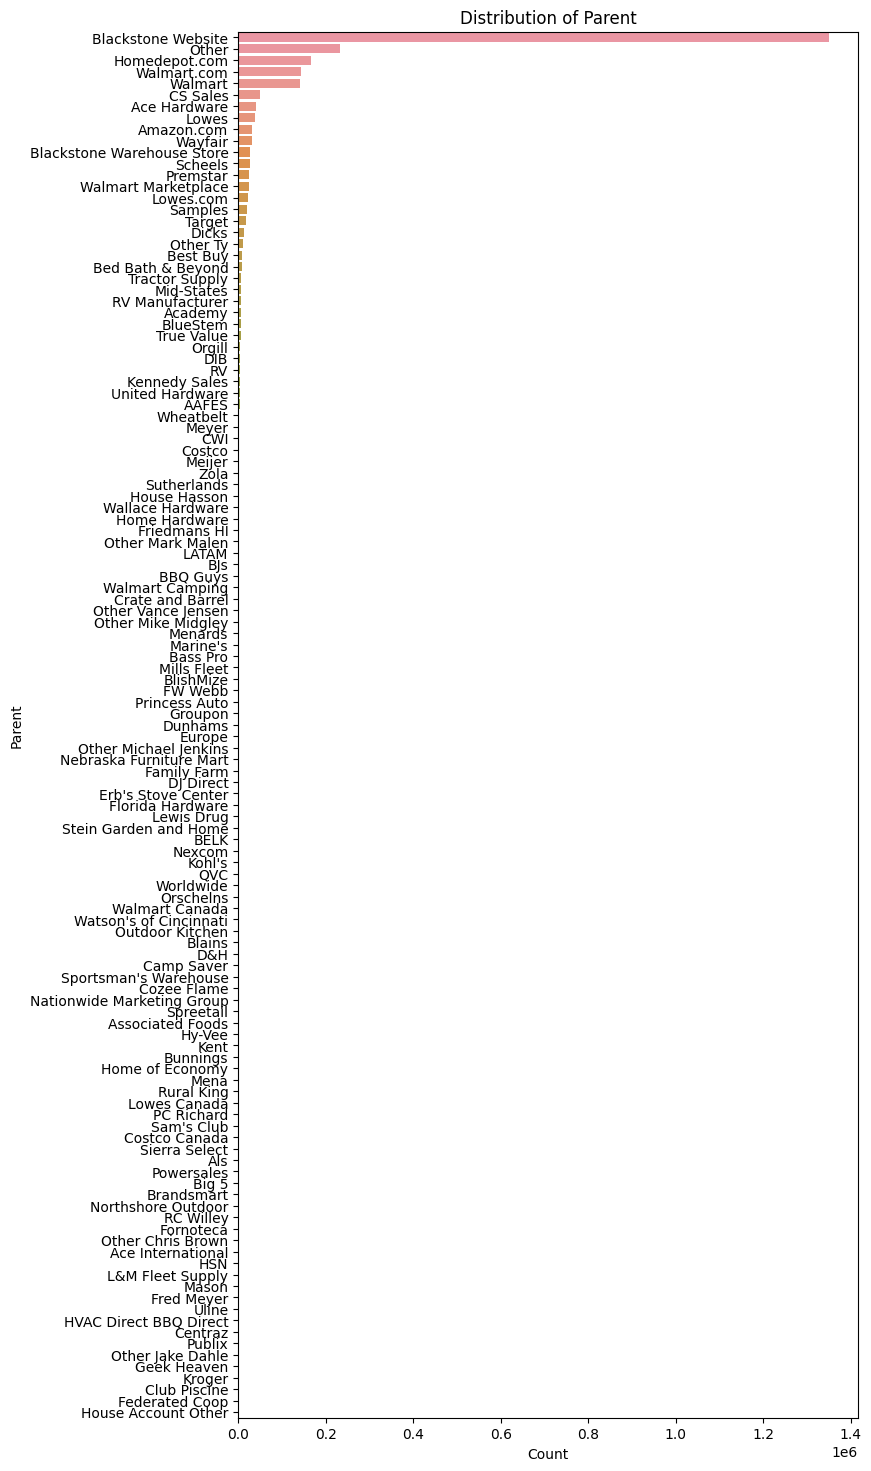

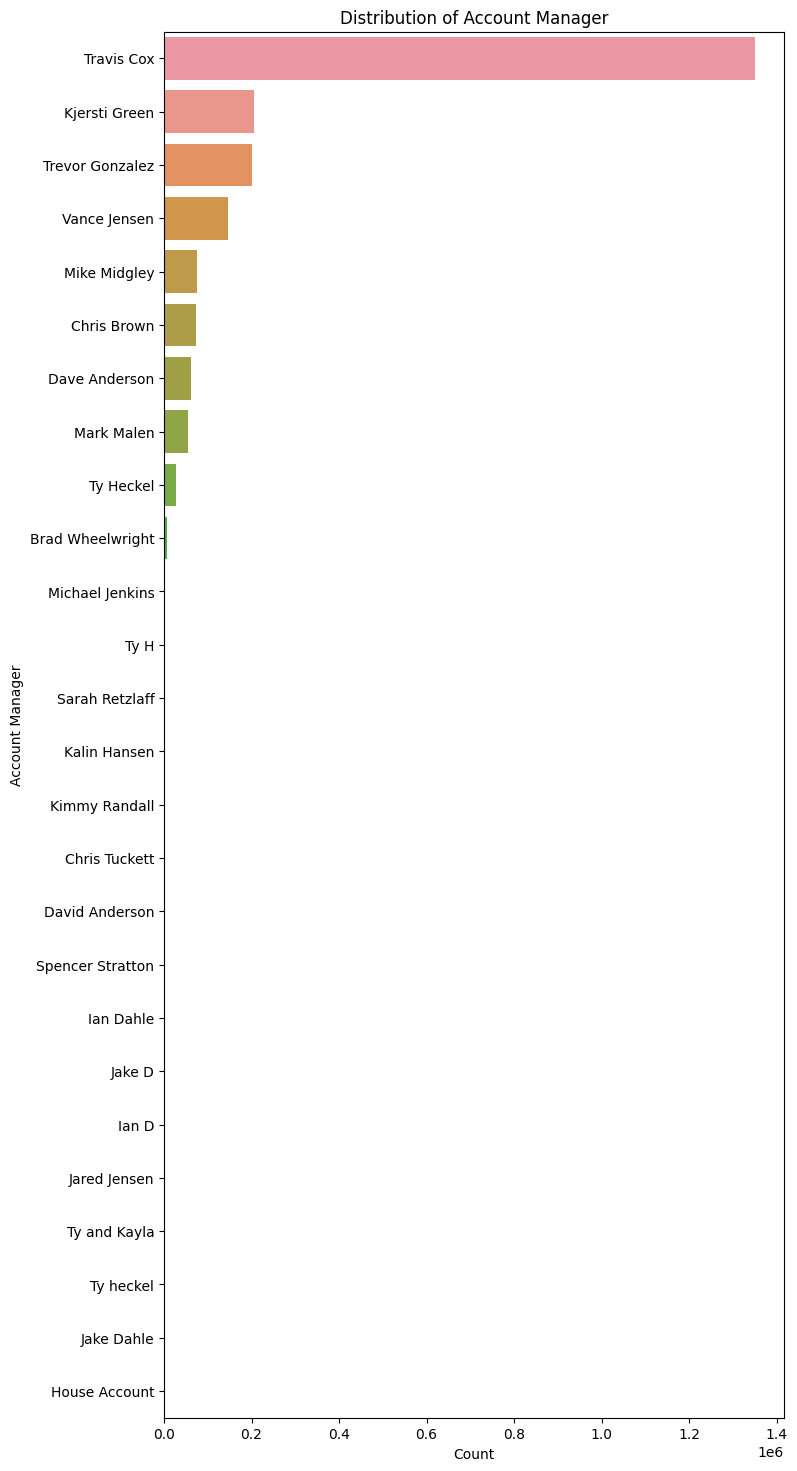

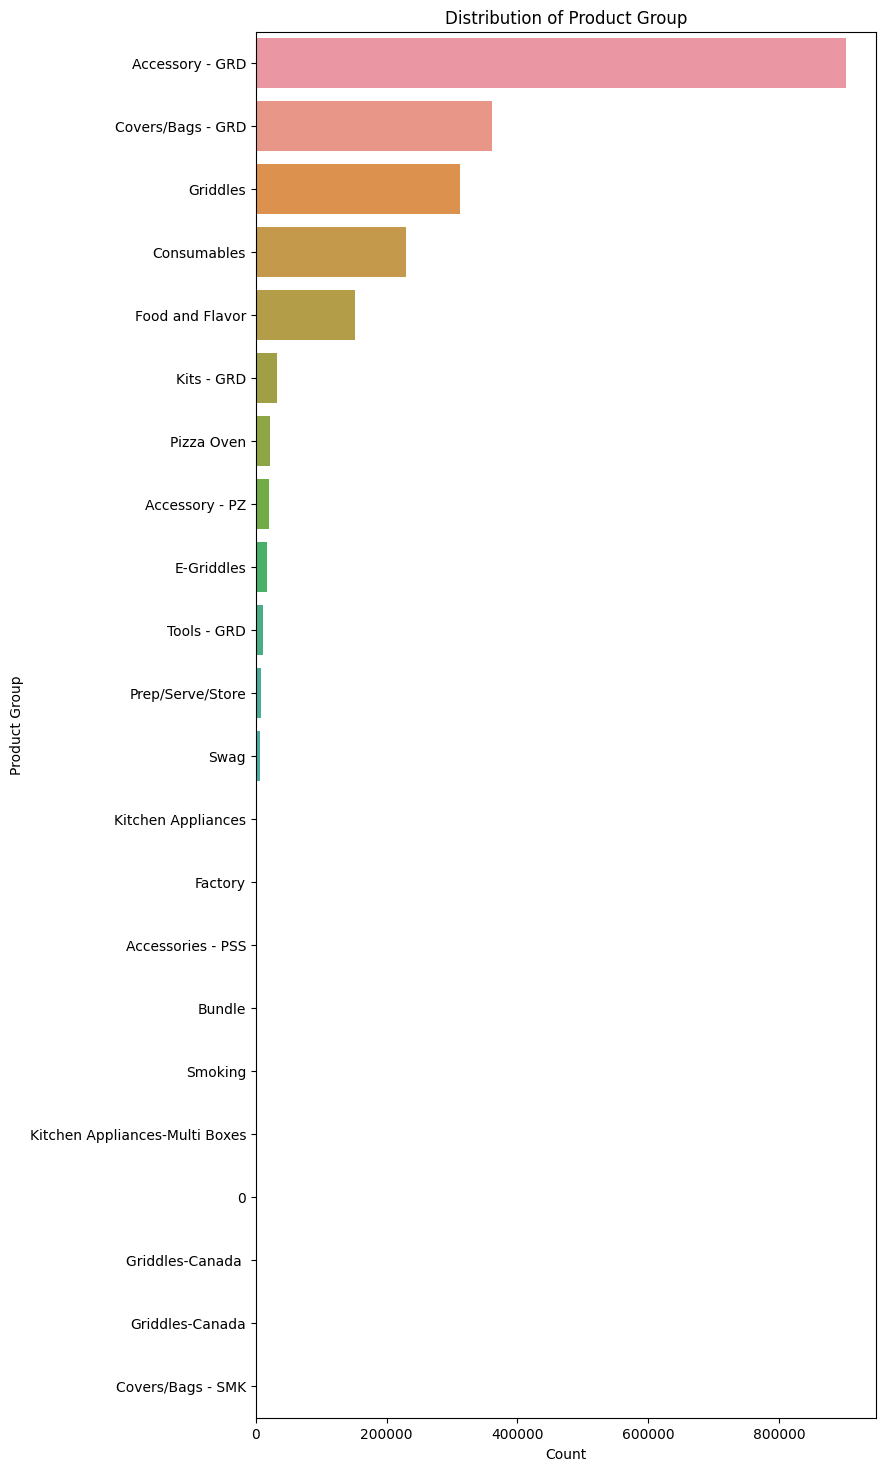

In [8]:
# Bar plots for categorical features
categorical_features = ['Parent', 'Account Manager', 'Product Group']
for feature in categorical_features:
    plt.figure(figsize=(8, 18))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

Majority of the order lines are from blackstone website, which the account manager is Travis so that makes sense. The most common product group is Accessory - GRD which i've since found out is because our product manage team puts that as the template for most items because it is the most stable. 

# Date

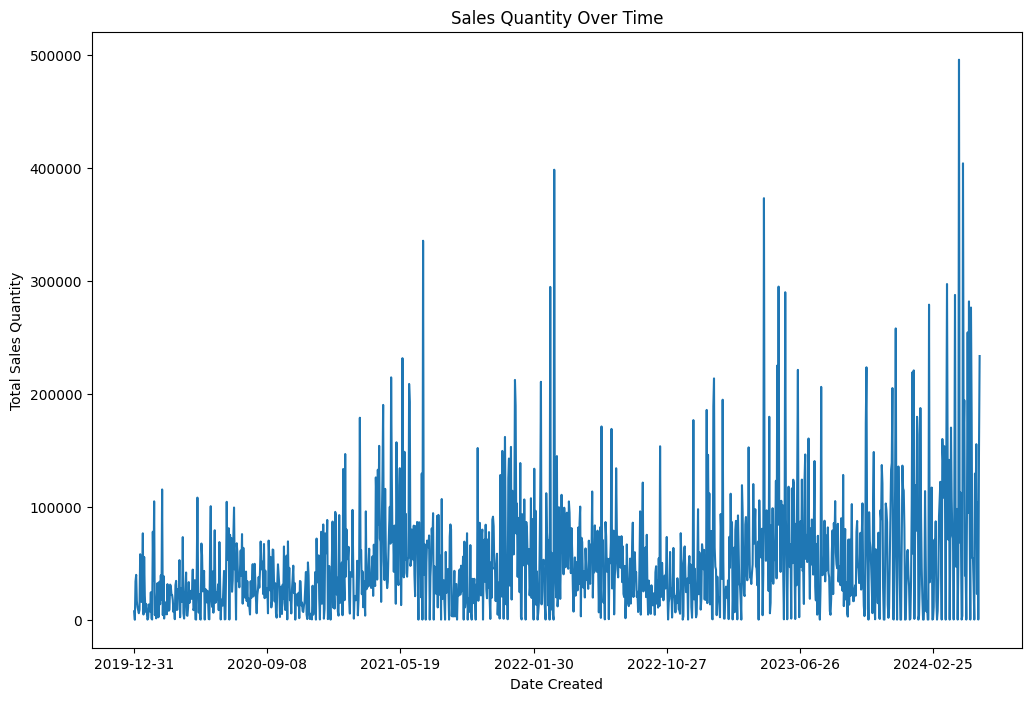

In [9]:
# Line plot for sales over time
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

plt.figure(figsize=(12, 8))
df.groupby('Date Created')['Quantity'].sum().plot()
plt.title('Sales Quantity Over Time')
plt.xlabel('Date Created')
plt.ylabel('Total Sales Quantity')
plt.show()

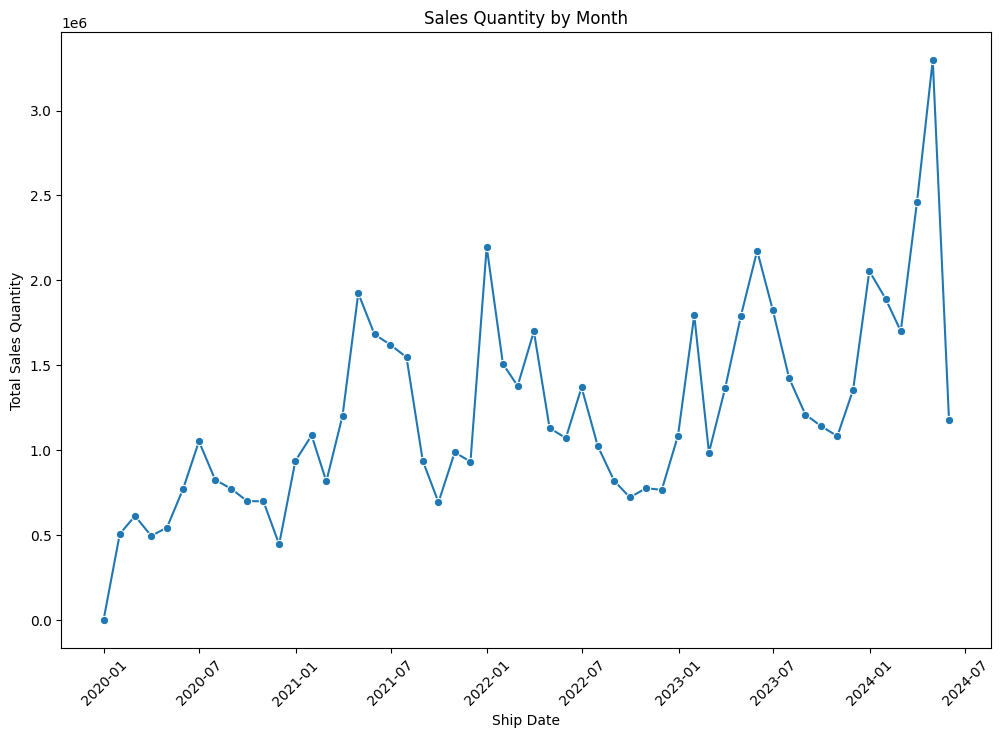

In [10]:
# Resample sales data by month
monthly_sales = df.resample('M', on='Ship Date')['Quantity'].sum().reset_index()

# Plot sales amount by month
plt.figure(figsize=(12, 8))
sns.lineplot(x='Ship Date', y='Quantity', data=monthly_sales, marker='o')
plt.title('Sales Quantity by Month')
plt.xlabel('Ship Date')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

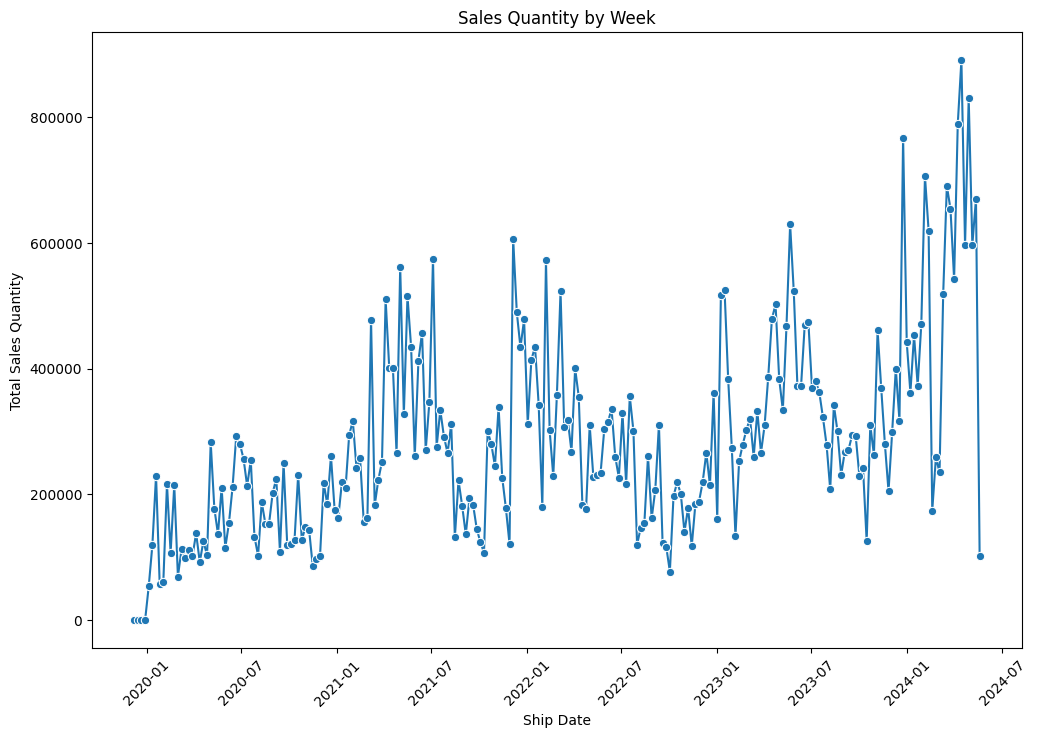

In [11]:
# Resample sales data by week
weekly_sales = df.resample('W', on='Ship Date')['Quantity'].sum().reset_index()

# Plot sales amount by week
plt.figure(figsize=(12, 8))
sns.lineplot(x='Ship Date', y='Quantity', data=weekly_sales, marker='o')
plt.title('Sales Quantity by Week')
plt.xlabel('Ship Date')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

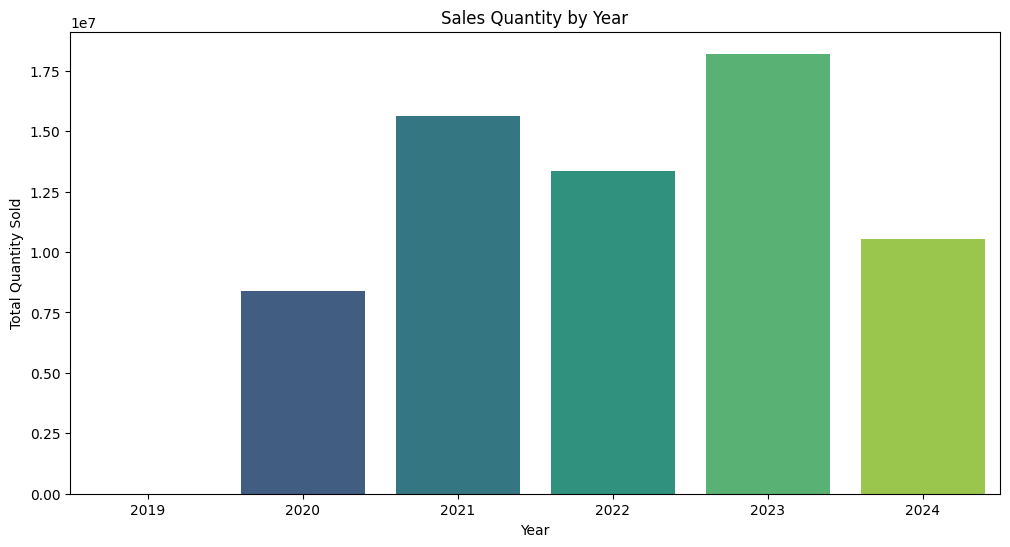

In [12]:
# Extract year
df['Ship Year'] = df['Ship Date'].dt.year

# Group by Ship Year and sum the quantities
quantity_by_year = df.groupby('Ship Year')['Quantity'].sum().reset_index()

# Plot sales quantity by year sorted by highest to lowest values
plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Year', y='Quantity', data=quantity_by_year, palette='viridis')
plt.title('Sales Quantity by Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.show()

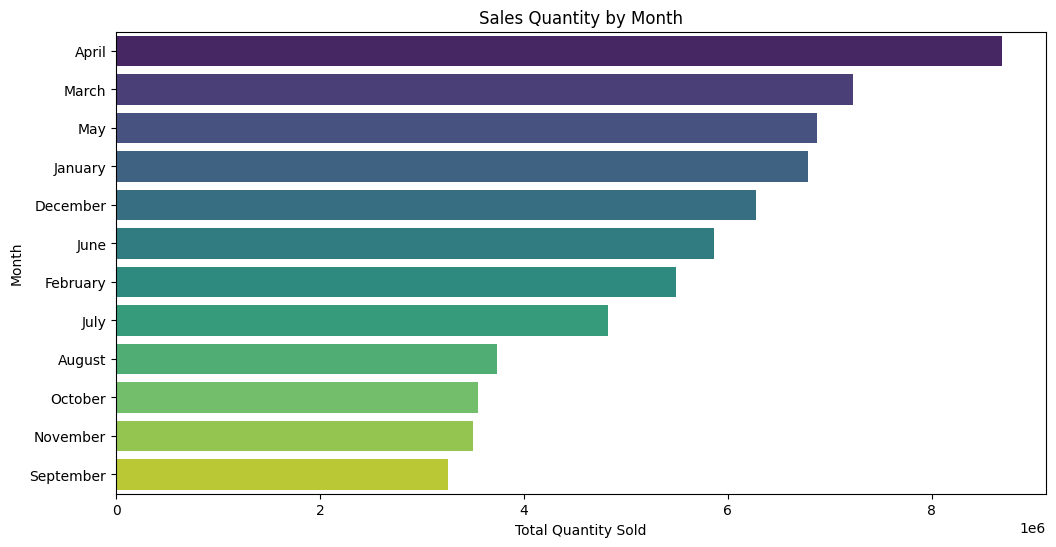

In [13]:
# Extract month
df['Ship Month'] = df['Ship Date'].dt.month_name()

# Group by Ship Month and sum the quantities
quantity_by_month = df.groupby('Ship Month')['Quantity'].sum().reset_index()

# Sort the quantities from highest to lowest
quantity_by_month = quantity_by_month.sort_values(by='Quantity', ascending=False)

# Plot sales quantity by month sorted by highest to lowest values
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Ship Month', data=quantity_by_month, palette='viridis')
plt.title('Sales Quantity by Month')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Month')
plt.show()

   Ship Month   Quantity
2    December  6275671.0
6        June  5866818.0
8         May  5701902.0
0       April  5390281.0
4     January  4897283.0
5        July  4820765.0
7       March  4765585.0
3    February  3794468.0
1      August  3740983.0
10    October  3546217.0
9    November  3499571.0
11  September  3257891.0


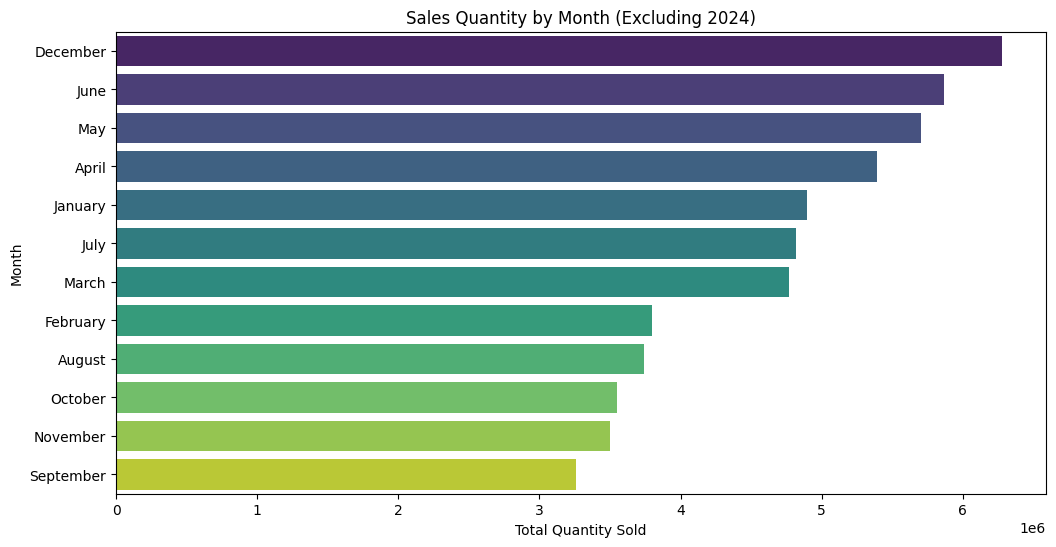

In [14]:
# Filter out rows where the year is 2024
df = df[df['Ship Date'].dt.year != 2024]

# Extract month name
df['Ship Month'] = df['Ship Date'].dt.month_name()

# Group by Ship Month and sum the quantities
quantity_by_month = df.groupby('Ship Month')['Quantity'].sum().reset_index()

# Sort the quantities from highest to lowest
quantity_by_month = quantity_by_month.sort_values(by='Quantity', ascending=False)

# Display the aggregated data
print(quantity_by_month)

# Plot sales quantity by month sorted by highest to lowest values
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Ship Month', data=quantity_by_month, palette='viridis')
plt.title('Sales Quantity by Month (Excluding 2024)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Month')
plt.show()

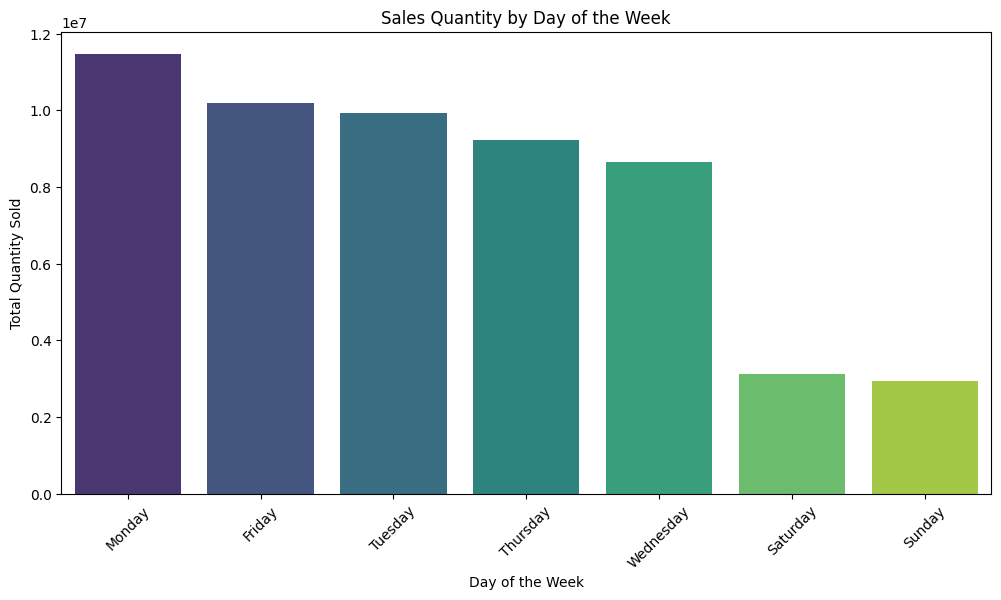

In [15]:
# Extract day of the week
df['Ship Day'] = df['Ship Date'].dt.day_name()

# Group by Ship Day and sum the quantities
quantity_by_day = df.groupby('Ship Day')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)


# Plot sales quantity by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Day', y='Quantity', data=quantity_by_day, palette='viridis')
plt.title('Sales Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Product Group

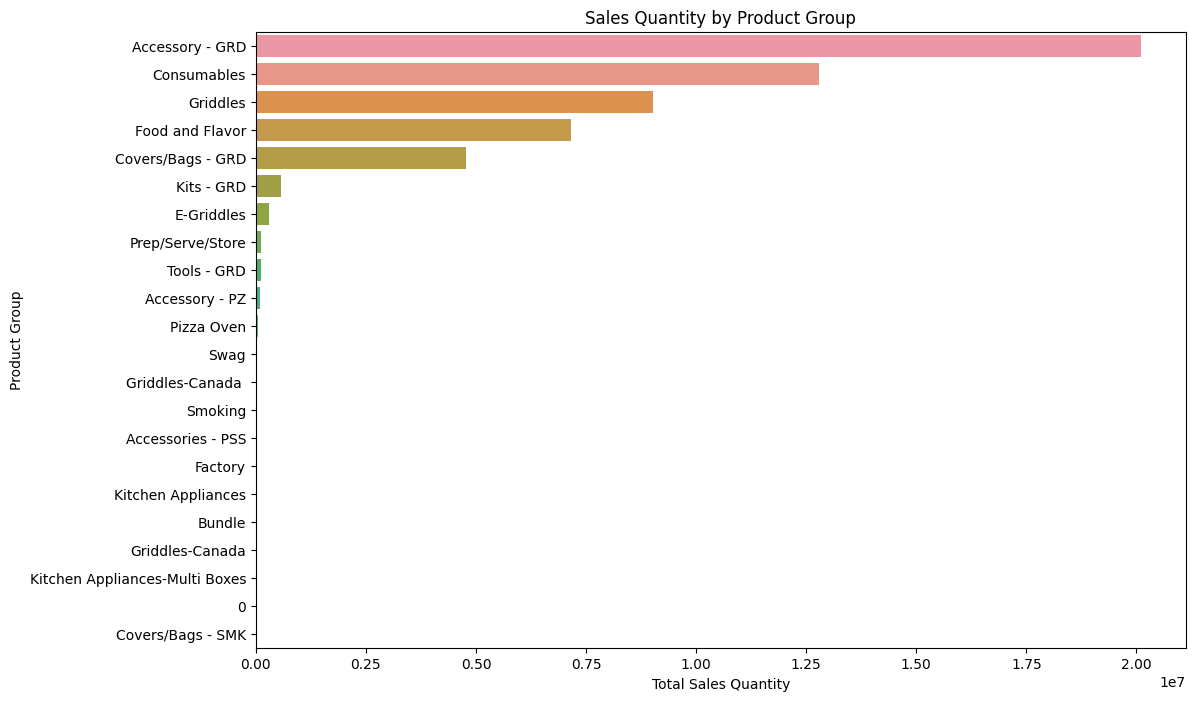

In [16]:
# Bar plot for sales by product group
sales_by_product_group = df.groupby('Product Group')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Product Group', data=sales_by_product_group)
plt.title('Sales Quantity by Product Group')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Group')
plt.show()

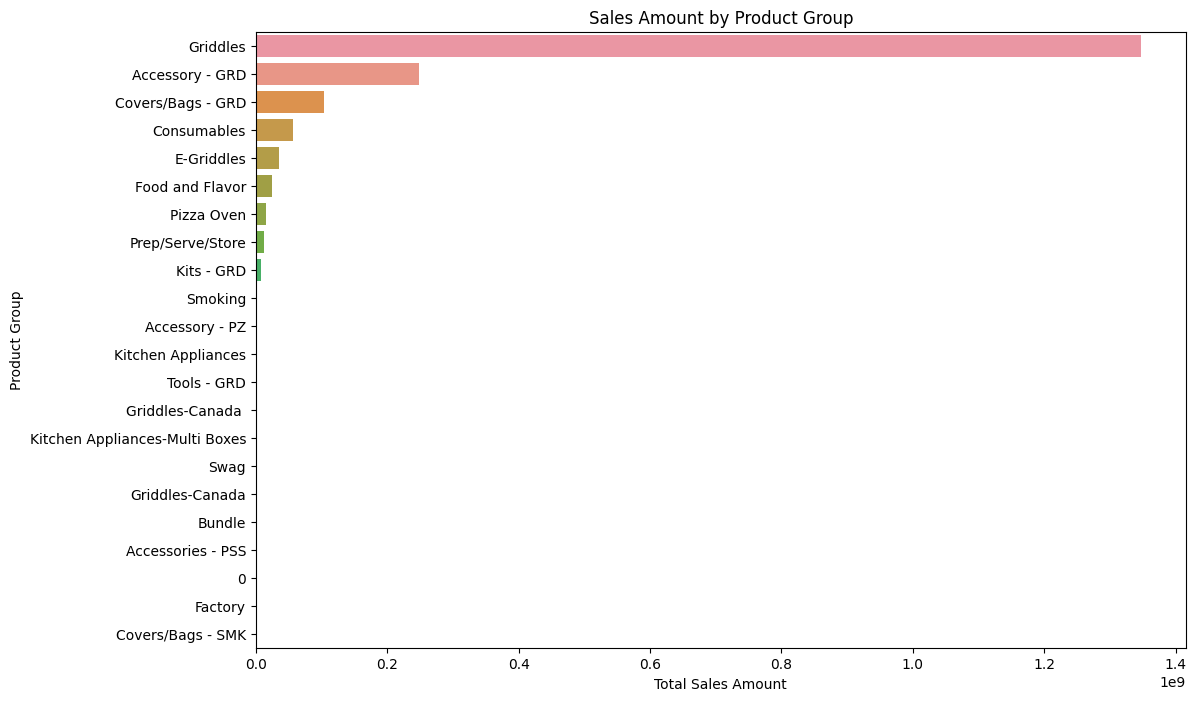

In [17]:
# Bar plot for sales by product group
sales_by_product_group = df.groupby('Product Group')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='Product Group', data=sales_by_product_group)
plt.title('Sales Amount by Product Group')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Group')
plt.show()

# Parent

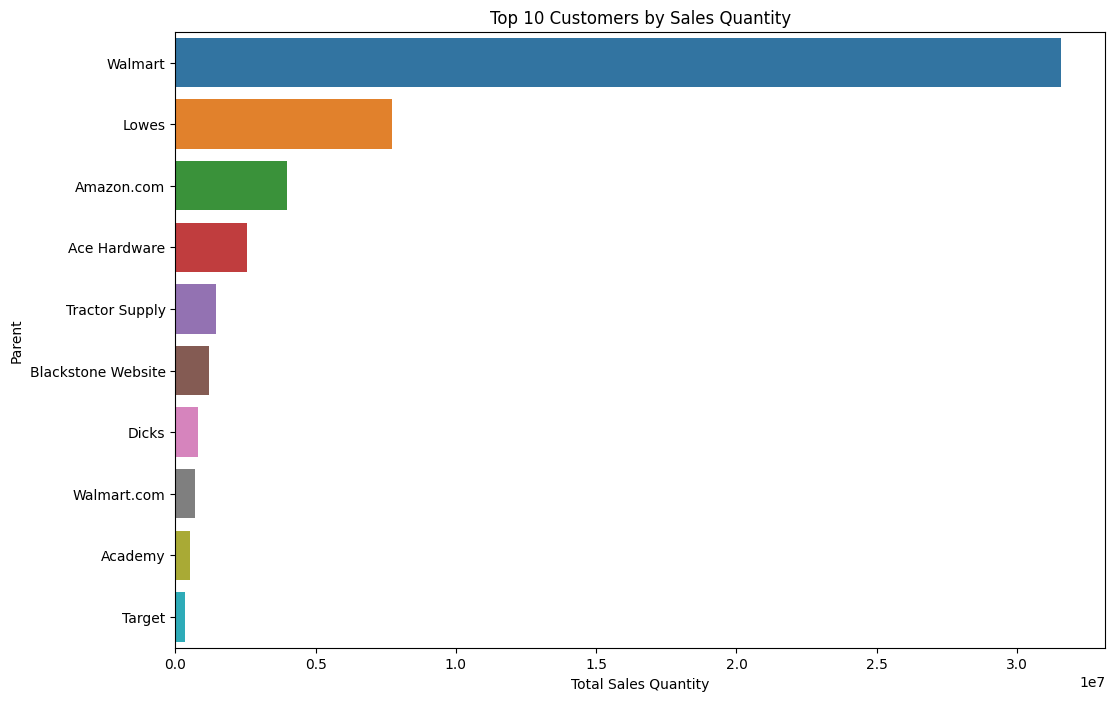

In [18]:
# Bar plot for top customers by sales amount
top_customers = df.groupby('Parent')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Parent', data=top_customers)
plt.title('Top 10 Customers by Sales Quantity')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Parent')
plt.show()

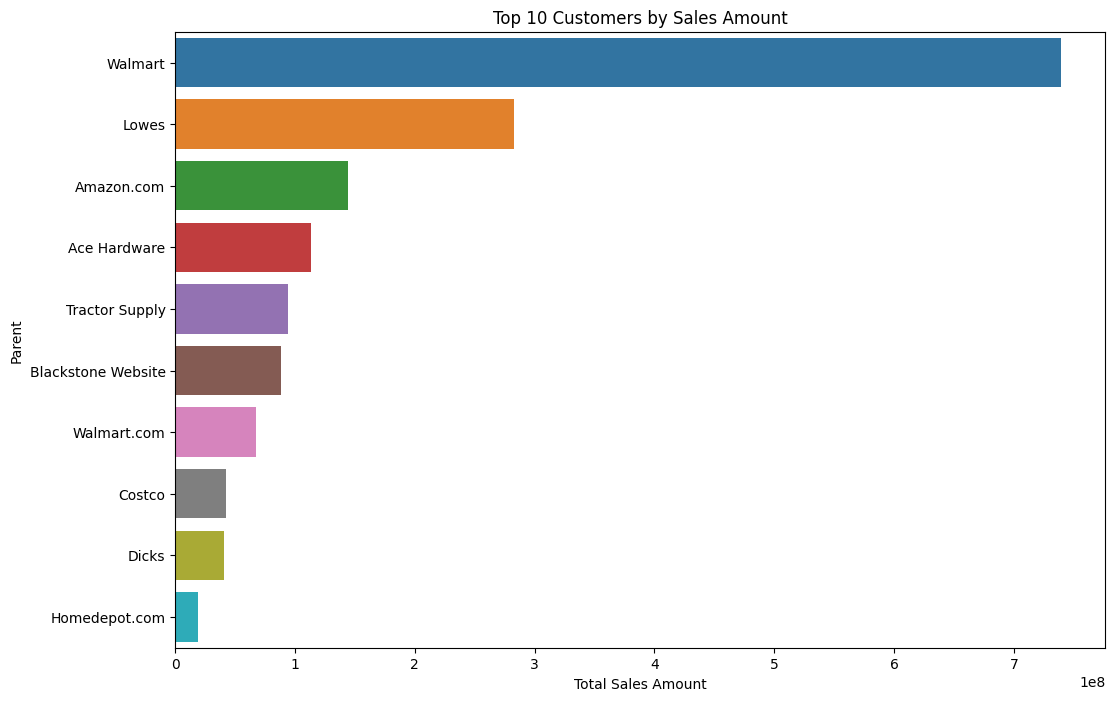

In [19]:
# Bar plot for top customers by sales amount
top_customers = df.groupby('Parent')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='Parent', data=top_customers)
plt.title('Top 10 Customers by Sales Amount')
plt.xlabel('Total Sales Amount')
plt.ylabel('Parent')
plt.show()

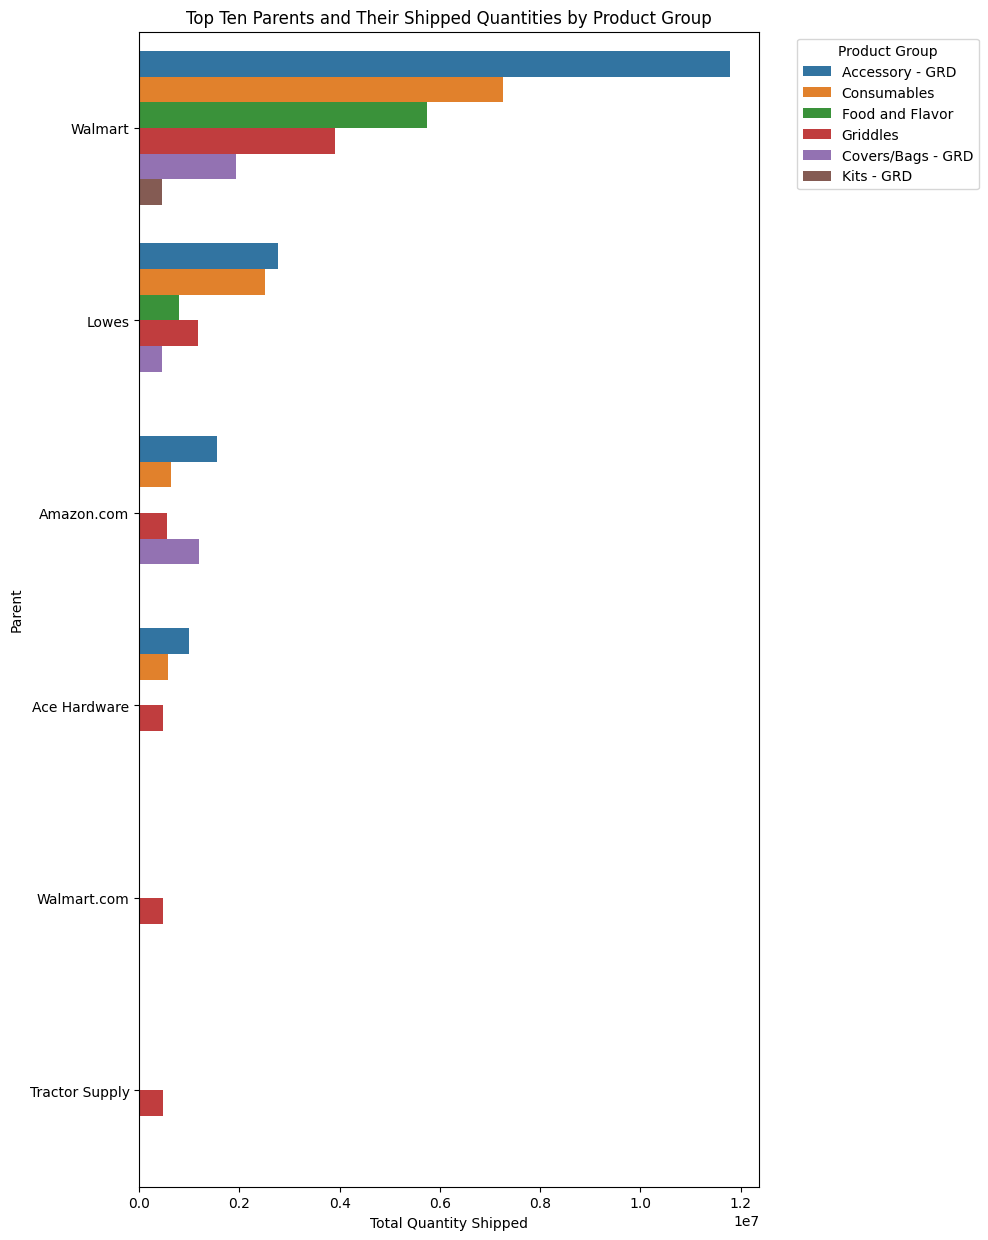

In [20]:
# Calculate the quantity shipped by product group for each top parent
top_parent_products_quantity = df.groupby(['Parent', 'Product Group'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False).head(20)

# Plot the top ten parents and their shipped quantities by product group
plt.figure(figsize=(8, 15))
sns.barplot(x='Quantity', y='Parent', hue='Product Group', data=top_parent_products_quantity)
plt.title('Top Ten Parents and Their Shipped Quantities by Product Group')
plt.xlabel('Total Quantity Shipped')
plt.ylabel('Parent')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

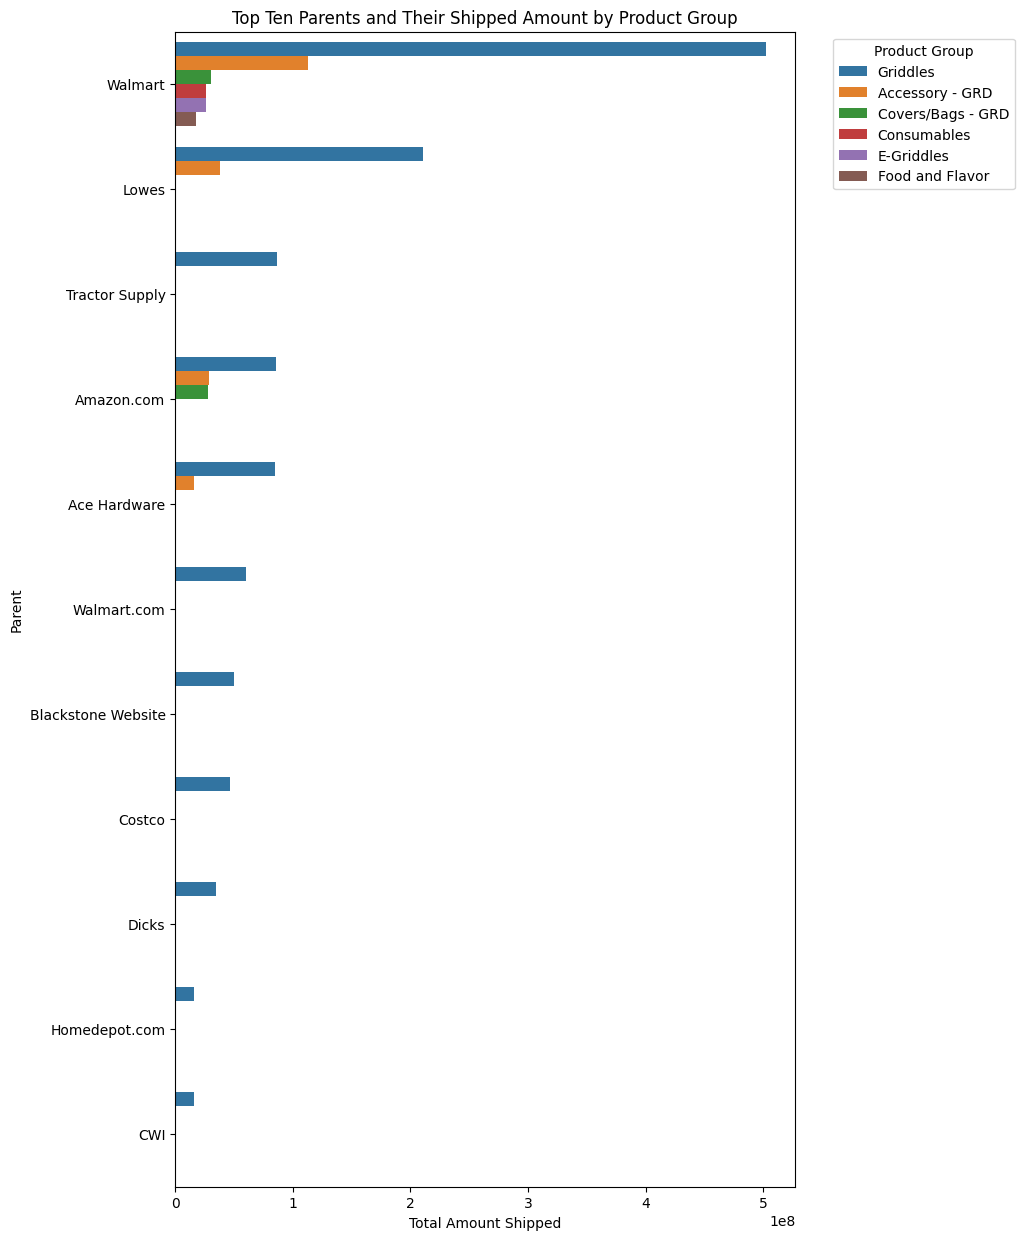

In [21]:
# Calculate the quantity shipped by product group for each top parent
top_parent_products_amount = df.groupby(['Parent', 'Product Group'])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(20)

# Plot the top ten parents and their shipped quantities by product group
plt.figure(figsize=(8, 15))
sns.barplot(x='Amount', y='Parent', hue='Product Group', data=top_parent_products_amount)
plt.title('Top Ten Parents and Their Shipped Amount by Product Group')
plt.xlabel('Total Amount Shipped')
plt.ylabel('Parent')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Item

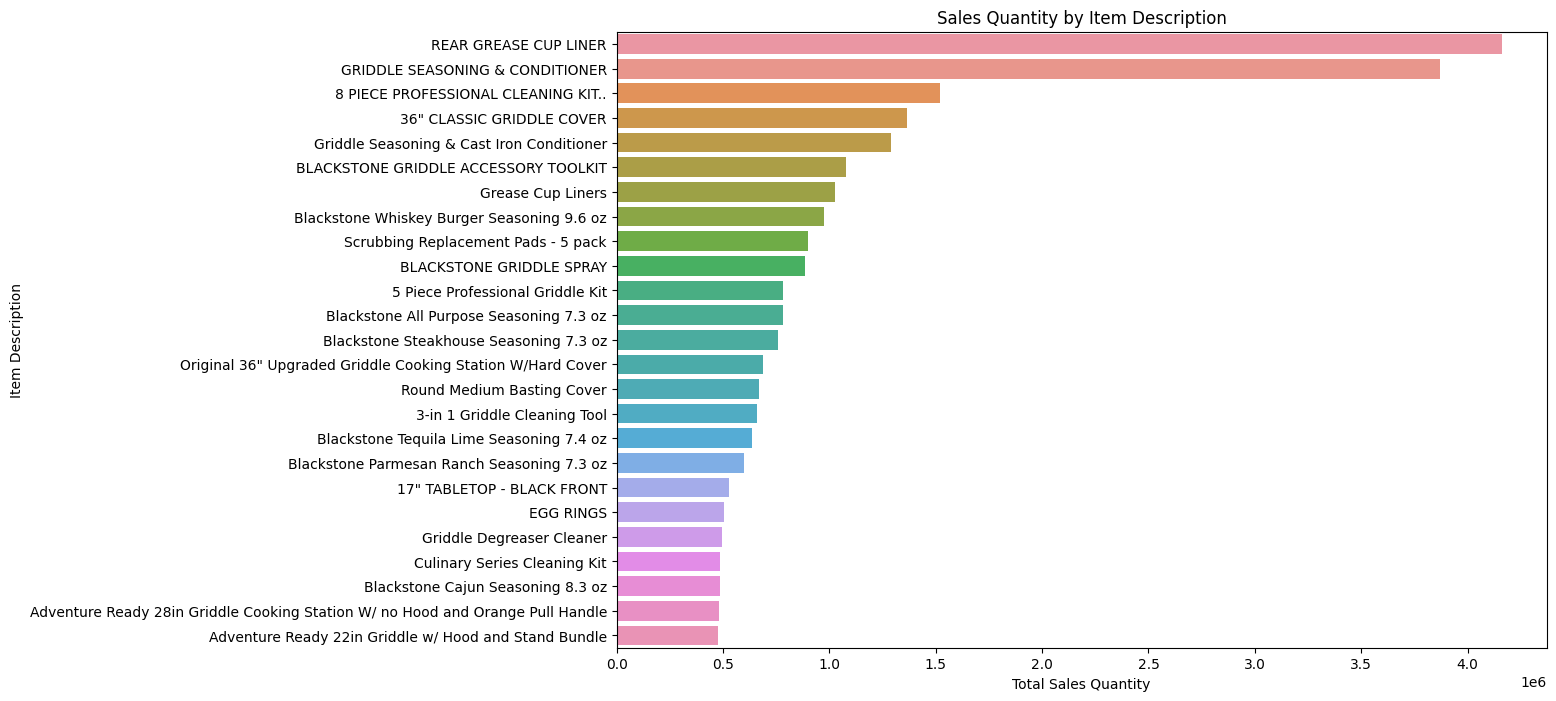

In [22]:
# Bar plot for sales by location
sales_by_item = df.groupby('Item Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Item Description', data=sales_by_item)
plt.title('Sales Quantity by Item Description')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Item Description')
plt.show()

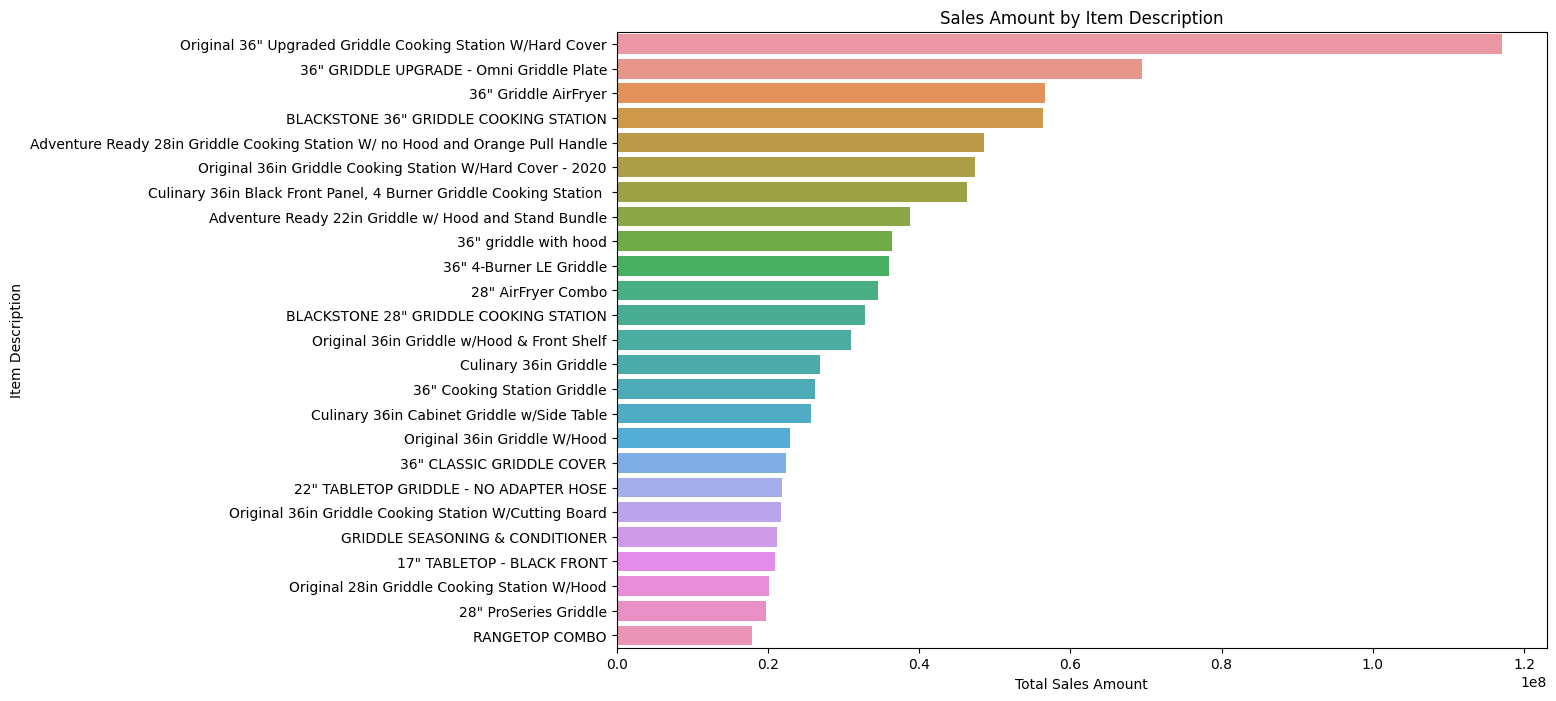

In [23]:
# Bar plot for sales by location
sales_by_item = df.groupby('Item Description')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='Item Description', data=sales_by_item)
plt.title('Sales Amount by Item Description')
plt.xlabel('Total Sales Amount')
plt.ylabel('Item Description')
plt.show()

# Import/Domestic EDA

In [24]:
pd.crosstab(df['Import/Domestic'],df['Import/Domestic'], normalize='all')*100

Import/Domestic,Domestic,Import
Import/Domestic,,
Domestic,98.712468,0.000000
Import,0.000000,1.287532


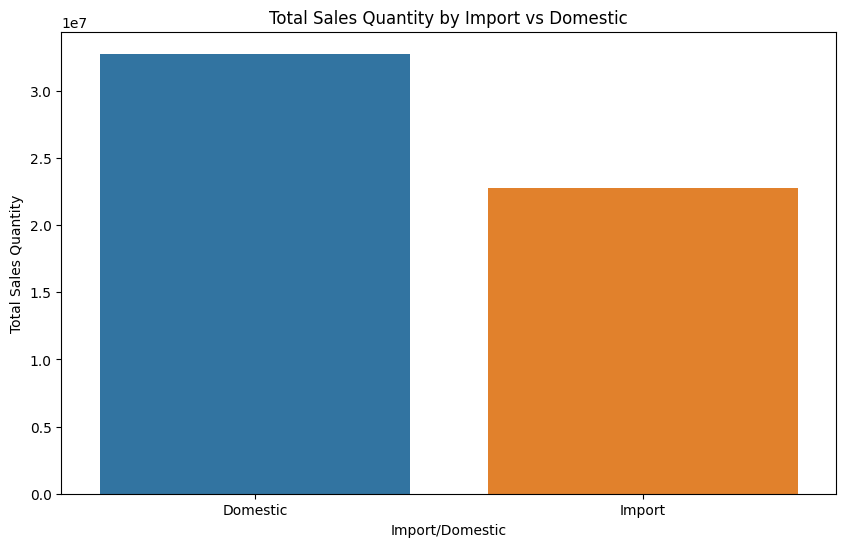

In [25]:
# Bar plot for total sales amount by Import vs Domestic
sales_by_import_domestic = df.groupby('Import/Domestic')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Import/Domestic', y='Quantity', data=sales_by_import_domestic)
plt.title('Total Sales Quantity by Import vs Domestic')
plt.xlabel('Import/Domestic')
plt.ylabel('Total Sales Quantity')
plt.show()

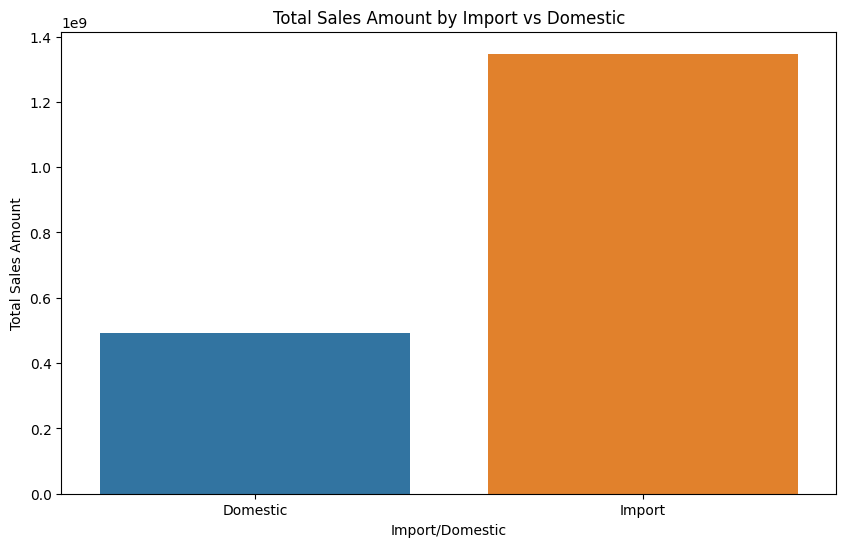

In [26]:
# Bar plot for total sales amount by Import vs Domestic
sales_by_import_domestic = df.groupby('Import/Domestic')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Import/Domestic', y='Amount', data=sales_by_import_domestic)
plt.title('Total Sales Amount by Import vs Domestic')
plt.xlabel('Import/Domestic')
plt.ylabel('Total Sales Amount')
plt.show()

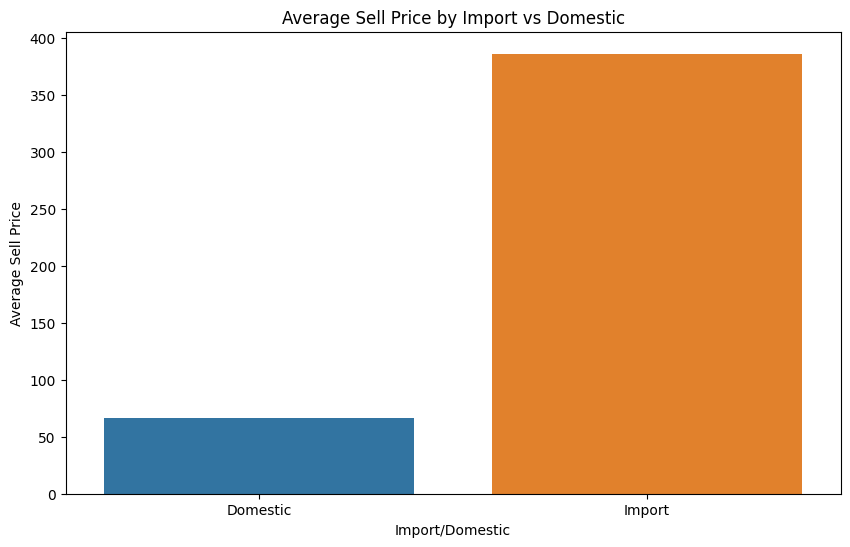

In [27]:
# Bar plot for average sell price by Import vs Domestic
avg_sell_price_by_import_domestic = df.groupby('Import/Domestic')['Sell Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Import/Domestic', y='Sell Price', data=avg_sell_price_by_import_domestic)
plt.title('Average Sell Price by Import vs Domestic')
plt.xlabel('Import/Domestic')
plt.ylabel('Average Sell Price')
plt.show()

# Sell Price

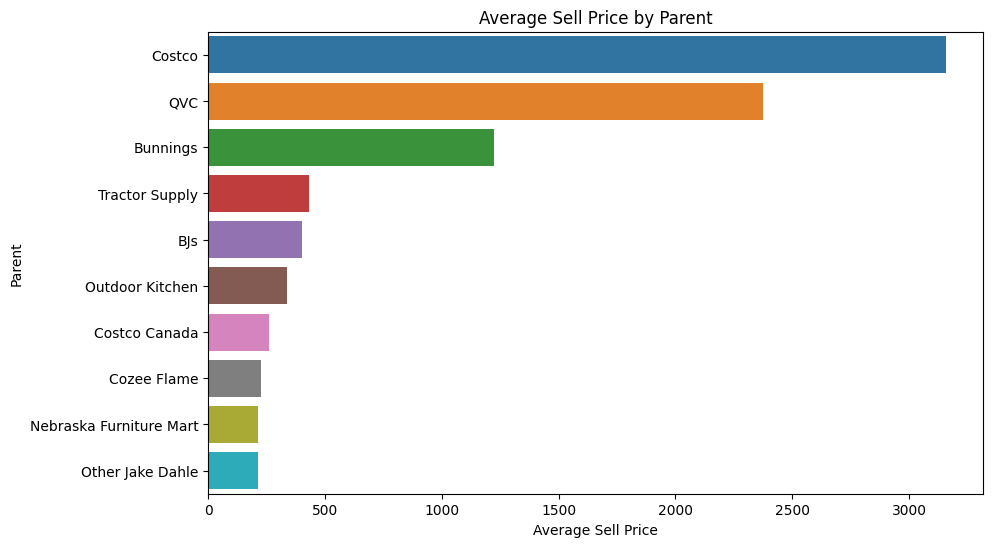

In [28]:
# Bar plot for average sell price by Parent
avg_sell_price_by_parent = df.groupby('Parent')['Sell Price'].mean().reset_index().sort_values(by='Sell Price', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sell Price', y='Parent', data=avg_sell_price_by_parent)
plt.title('Average Sell Price by Parent')
plt.xlabel('Average Sell Price')
plt.ylabel('Parent')
plt.show()

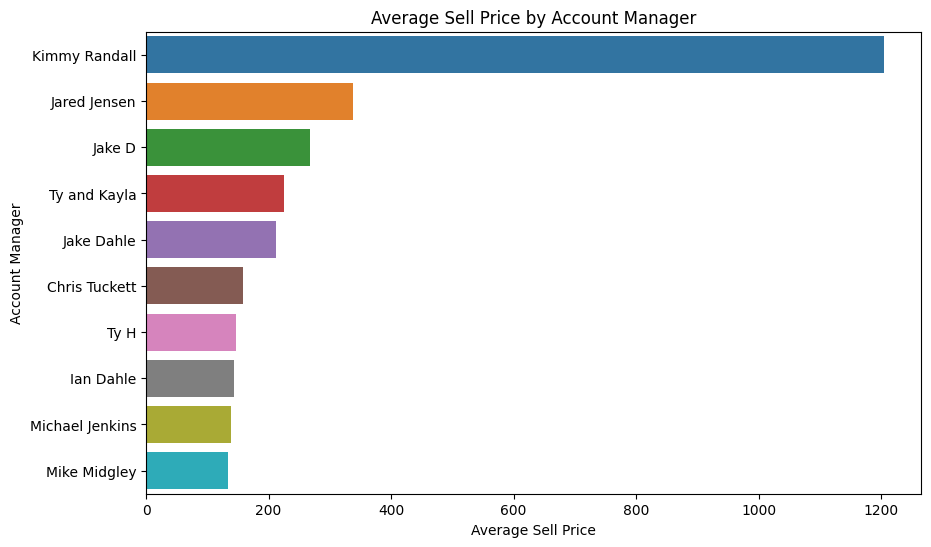

In [29]:
# Bar plot for average sell price by Parent
avg_sell_price_by_account_manager = df.groupby('Account Manager')['Sell Price'].mean().reset_index().sort_values(by='Sell Price', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sell Price', y='Account Manager', data=avg_sell_price_by_account_manager)
plt.title('Average Sell Price by Account Manager')
plt.xlabel('Average Sell Price')
plt.ylabel('Account Manager')
plt.show()

# State

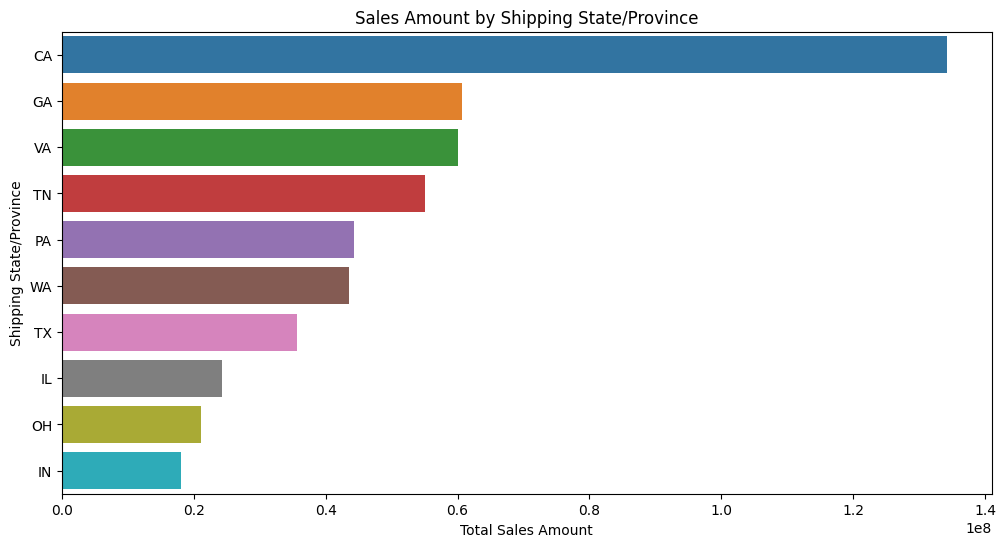

In [30]:
# Sales by Shipping State/Province
sales_by_state = df.groupby('Shipping State/Province')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Shipping State/Province', data=sales_by_state)
plt.title('Sales Amount by Shipping State/Province')
plt.xlabel('Total Sales Amount')
plt.ylabel('Shipping State/Province')
plt.show()

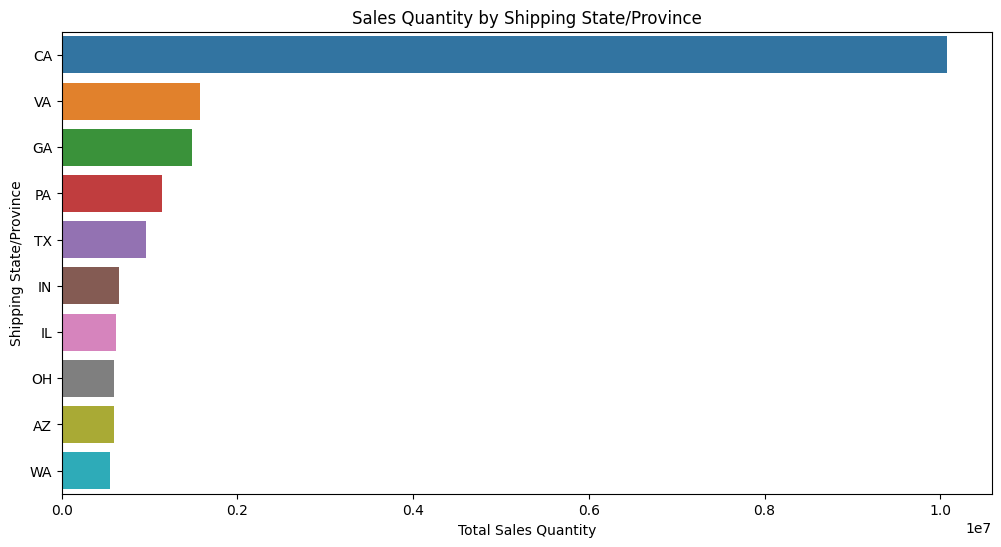

In [31]:
# Sales by Shipping State/Province
sales_by_state = df.groupby('Shipping State/Province')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Shipping State/Province', data=sales_by_state)
plt.title('Sales Quantity by Shipping State/Province')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Shipping State/Province')
plt.show()

# Parent Product Group

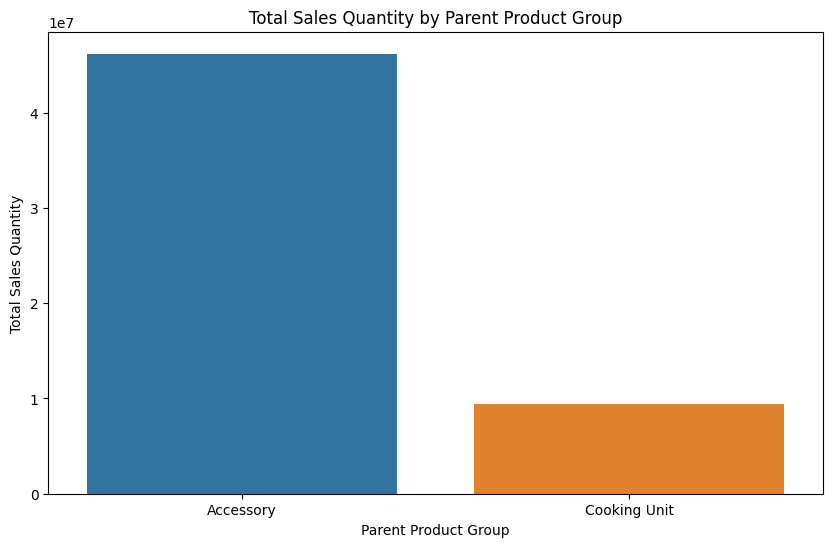

In [32]:
# Bar plot for total sales amount by Parent Product Group
sales_quantity_by_parent = df.groupby('Parent Product Group')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Parent Product Group', y='Quantity', data=sales_quantity_by_parent)
plt.title('Total Sales Quantity by Parent Product Group')
plt.xlabel('Parent Product Group')
plt.ylabel('Total Sales Quantity')
plt.show()

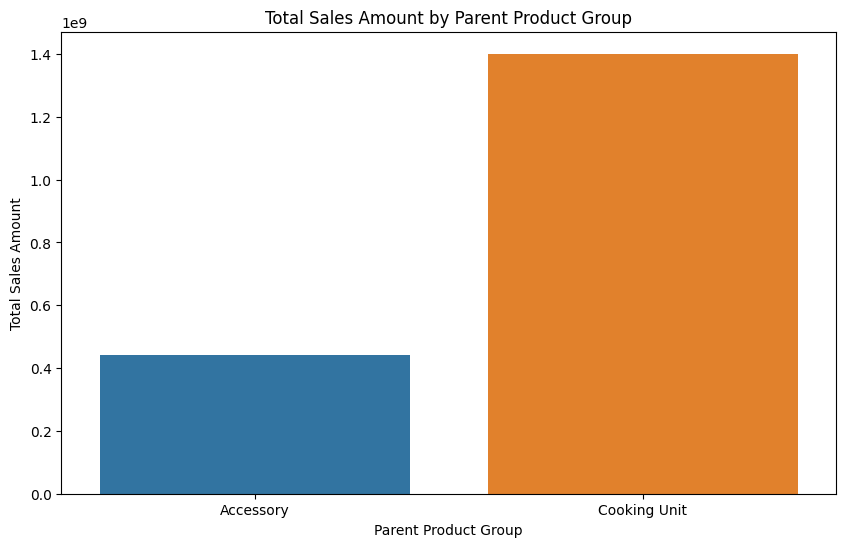

In [33]:
# Bar plot for total sales amount by Parent Product Group
sales_amount_by_parent = df.groupby('Parent Product Group')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Parent Product Group', y='Amount', data=sales_amount_by_parent)
plt.title('Total Sales Amount by Parent Product Group')
plt.xlabel('Parent Product Group')
plt.ylabel('Total Sales Amount')
plt.show()

# Quantity vs Sell Price

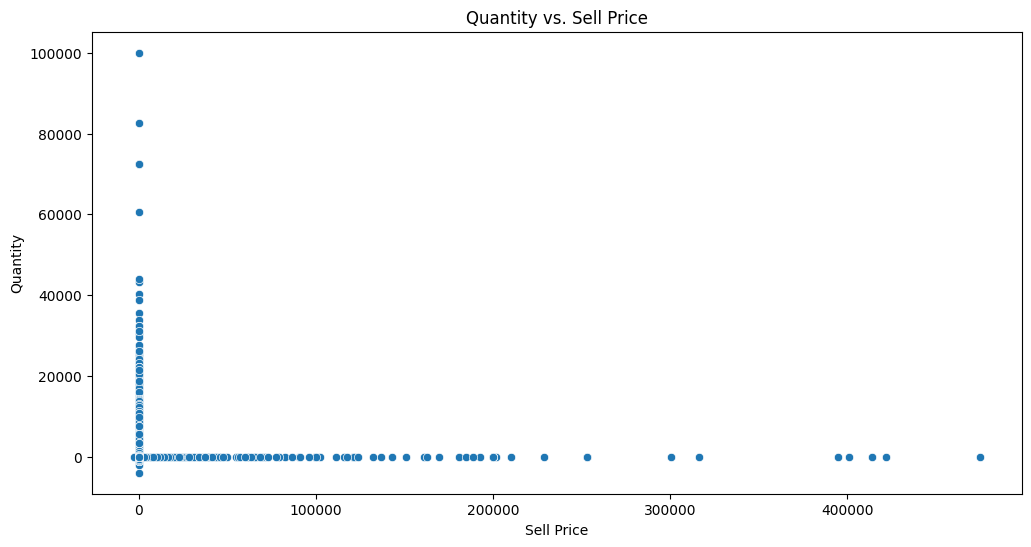

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sell Price', y='Quantity', data=df)
plt.title('Quantity vs. Sell Price')
plt.xlabel('Sell Price')
plt.ylabel('Quantity')
plt.show()

# Online Sales

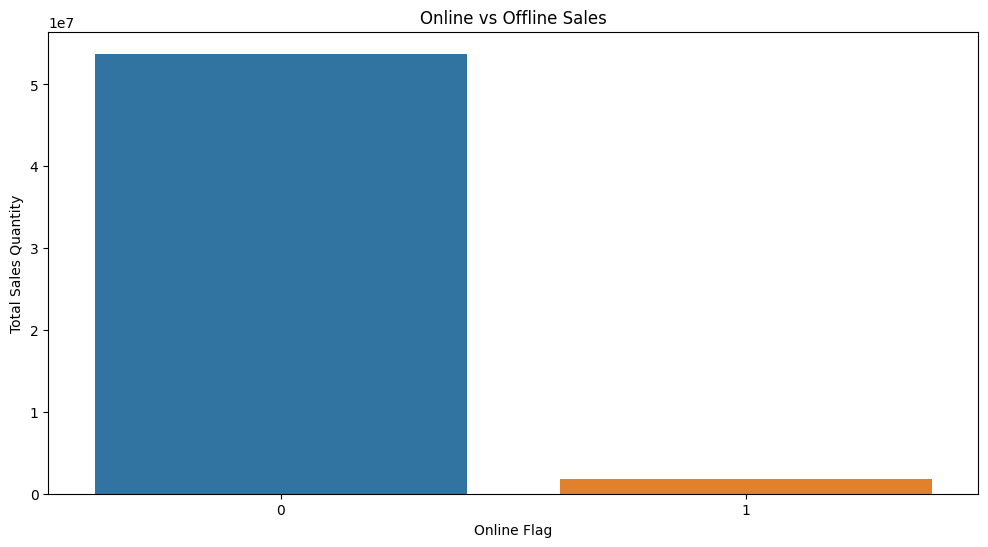

In [35]:
# Sales by Online Flag
online_sales = df.groupby('Online Flag')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Online Flag', y='Quantity', data=online_sales)
plt.title('Online vs Offline Sales')
plt.xlabel('Online Flag')
plt.ylabel('Total Sales Quantity')
plt.show()

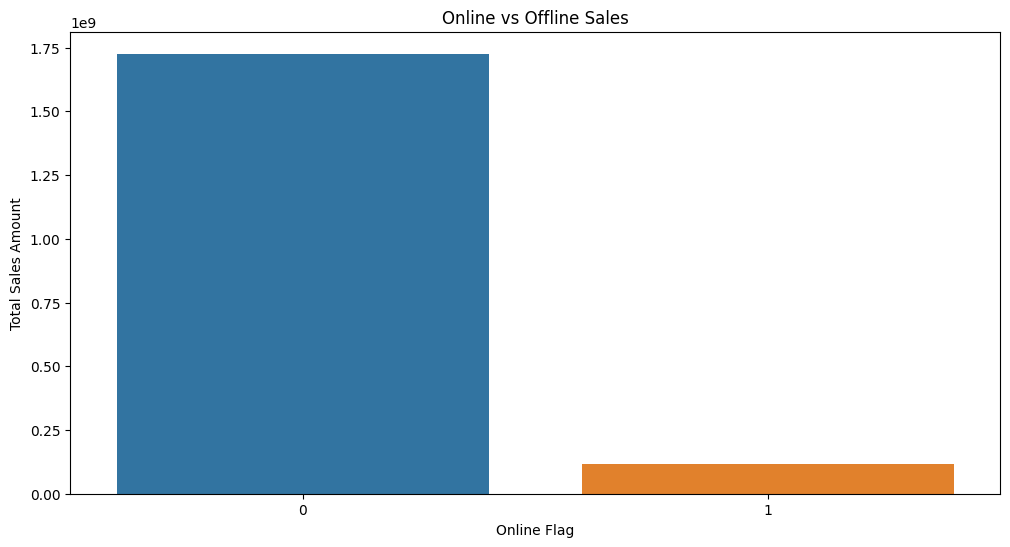

In [36]:
# Sales by Online Flag
online_sales = df.groupby('Online Flag')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Online Flag', y='Amount', data=online_sales)
plt.title('Online vs Offline Sales')
plt.xlabel('Online Flag')
plt.ylabel('Total Sales Amount')
plt.show()

# Shipping Address

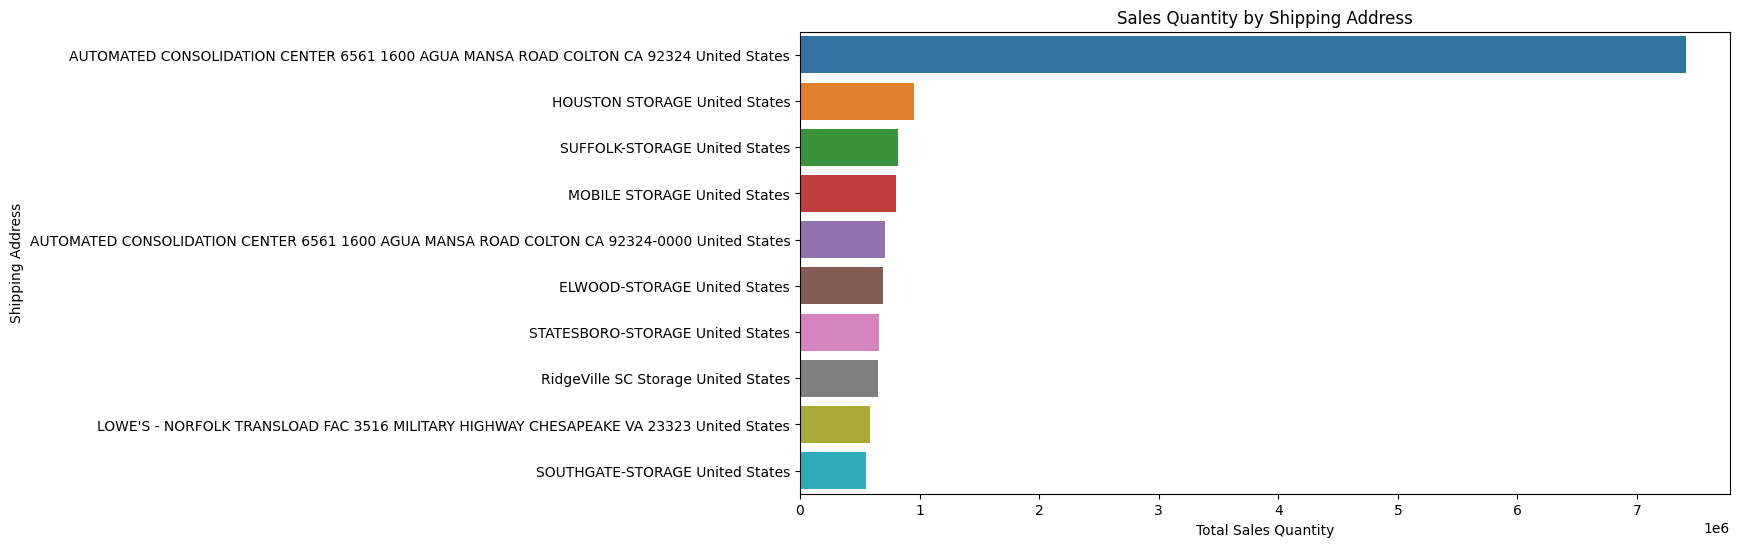

In [37]:
# Sales by Shipping Address
sales_quantity_by_adress = df.groupby('Shipping Address')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Shipping Address', data=sales_quantity_by_adress)
plt.title('Sales Quantity by Shipping Address')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Shipping Address')
plt.show()

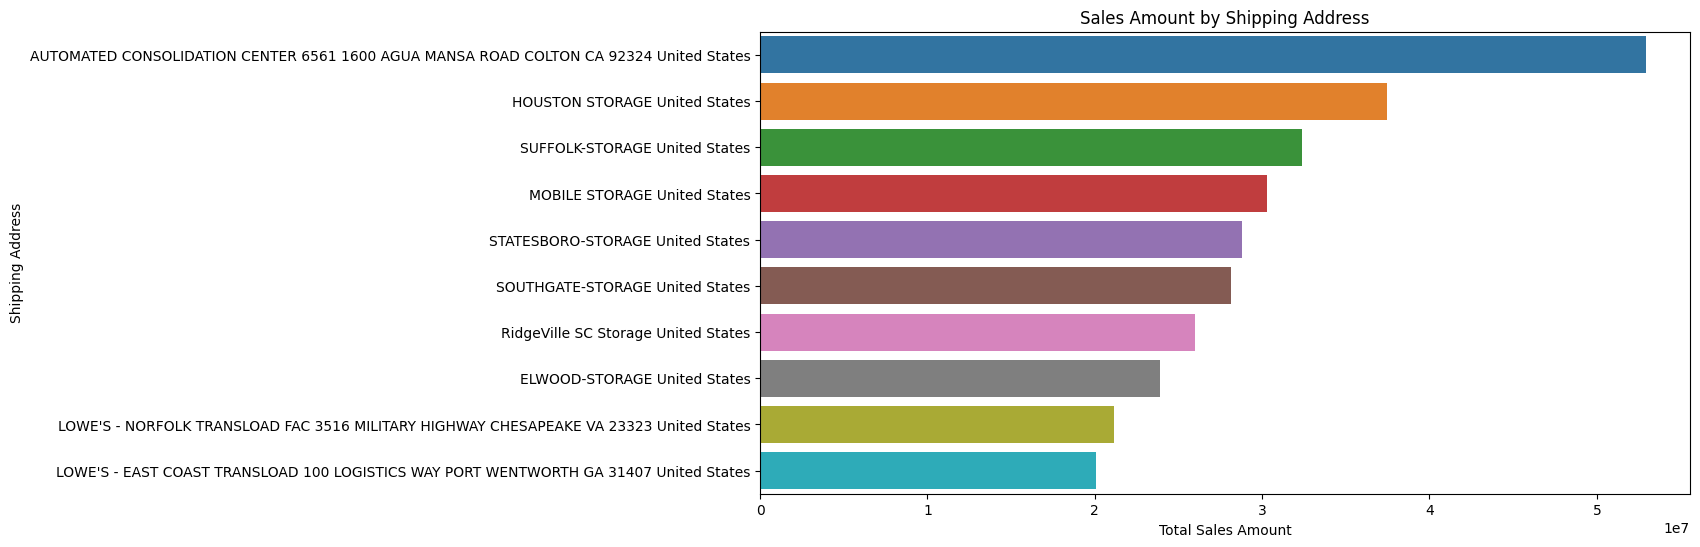

In [38]:
# Sales by Shipping State/Province
sales_amount_by_adress= df.groupby('Shipping Address')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Shipping Address', data=sales_amount_by_adress)
plt.title('Sales Amount by Shipping Address')
plt.xlabel('Total Sales Amount')
plt.ylabel('Shipping Address')
plt.show()

# Invoices

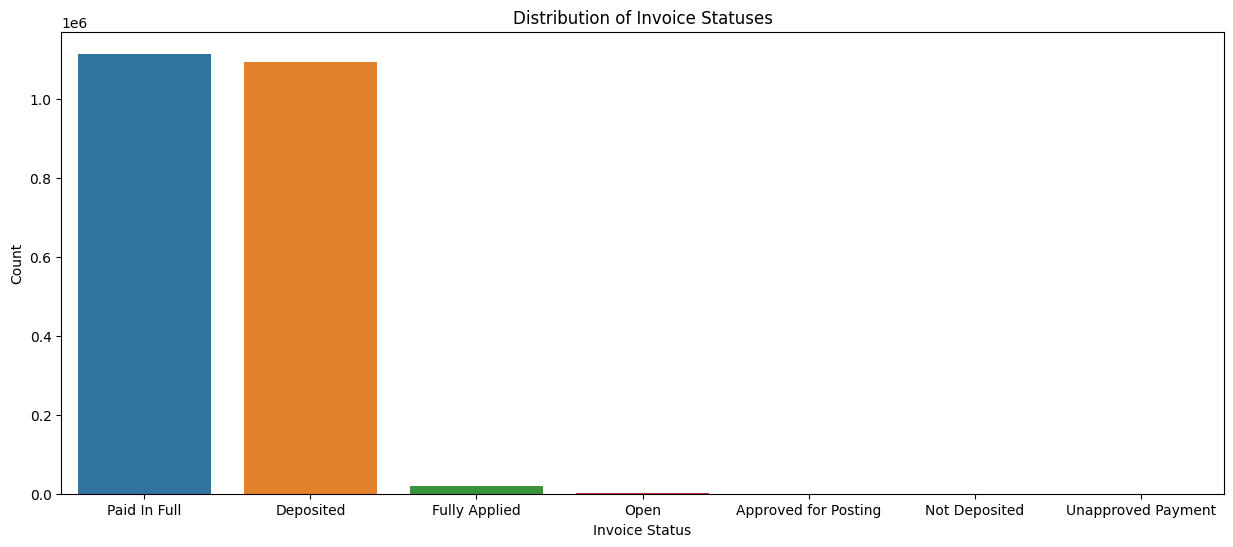

In [39]:
# Calculate value counts and sort them in descending order
invoice_status_counts = df['Invoice Status'].value_counts().sort_values(ascending=False)

# Create a categorical type with the sorted order
df['Invoice Status'] = pd.Categorical(df['Invoice Status'], categories=invoice_status_counts.index, ordered=True)

# Plot the count plot with sorted categories
plt.figure(figsize=(15, 6))
sns.countplot(x='Invoice Status', data=df, order=invoice_status_counts.index)
plt.title('Distribution of Invoice Statuses')
plt.xlabel('Invoice Status')
plt.ylabel('Count')
plt.show()

# Order Value

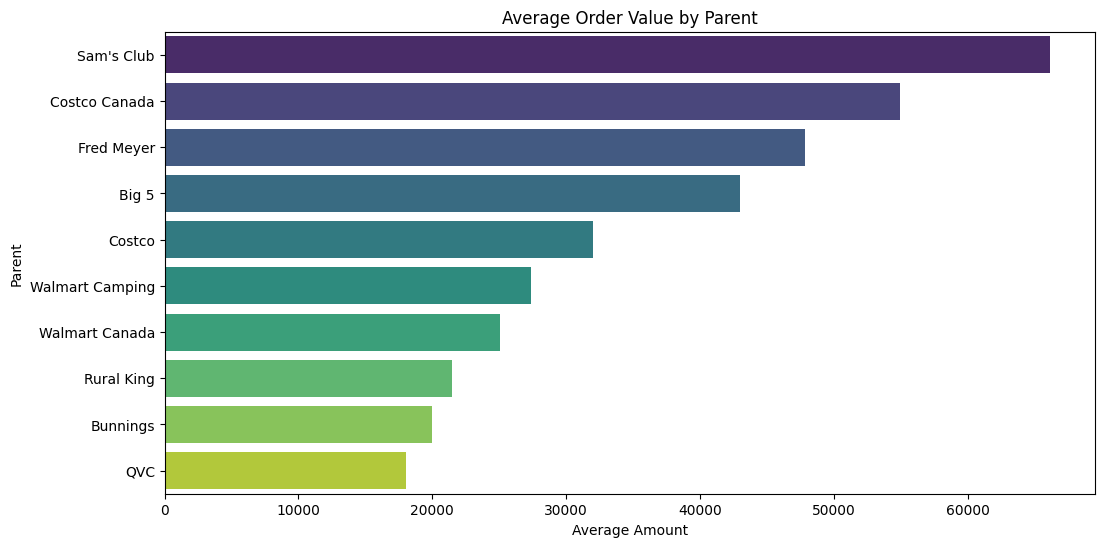

In [40]:
aov_by_customer = df.groupby('Parent')['Amount'].mean().reset_index().sort_values(by='Amount', ascending=False).head(10)

# Plot AOV by customer
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Parent', data=aov_by_customer, palette='viridis')
plt.title('Average Order Value by Parent')
plt.xlabel('Average Amount')
plt.ylabel('Parent')
plt.show()

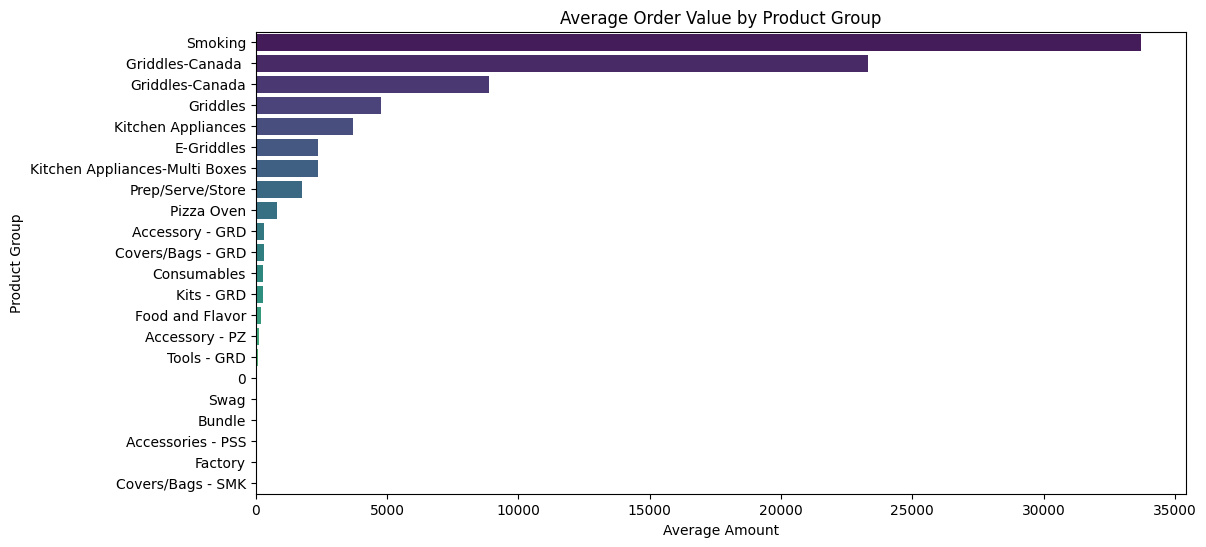

In [41]:
# Calculate AOV by product group
aov_by_product_group = df.groupby('Product Group')['Amount'].mean().reset_index()

# Sort by AOV and get the top product groups if needed
aov_by_product_group = aov_by_product_group.sort_values(by='Amount', ascending=False)

# Plot AOV by product group
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Product Group', data=aov_by_product_group, palette='viridis')
plt.title('Average Order Value by Product Group')
plt.xlabel('Average Amount')
plt.ylabel('Product Group')
plt.show()